# Forecast Resources

## Commodity Analysis

Loading the dataset...
Dataset spans from 29 Oct 1997 to 01 Apr 2025
Number of records: 6905
Available commodities: CL=F, BZ=F, GC=F, SI=F, NG=F, ZC=F, ZW=F, ZS=F, HG=F, PL=F, PA=F

Calculating daily returns...

Summary Statistics for Daily Returns:
        count   mean   std      min    25%   50%   75%    max
CL=F $1258.00 $-0.15 $9.84 $-305.97 $-1.30 $0.22 $1.58 $37.66
GC=F $1258.00  $0.06 $0.97   $-4.98 $-0.43 $0.08 $0.64  $4.25
SI=F $1258.00  $0.09 $2.05  $-10.98 $-0.99 $0.07 $1.14  $9.29
NG=F $1258.00  $0.19 $4.86  $-25.95 $-2.65 $0.11 $2.88 $46.48


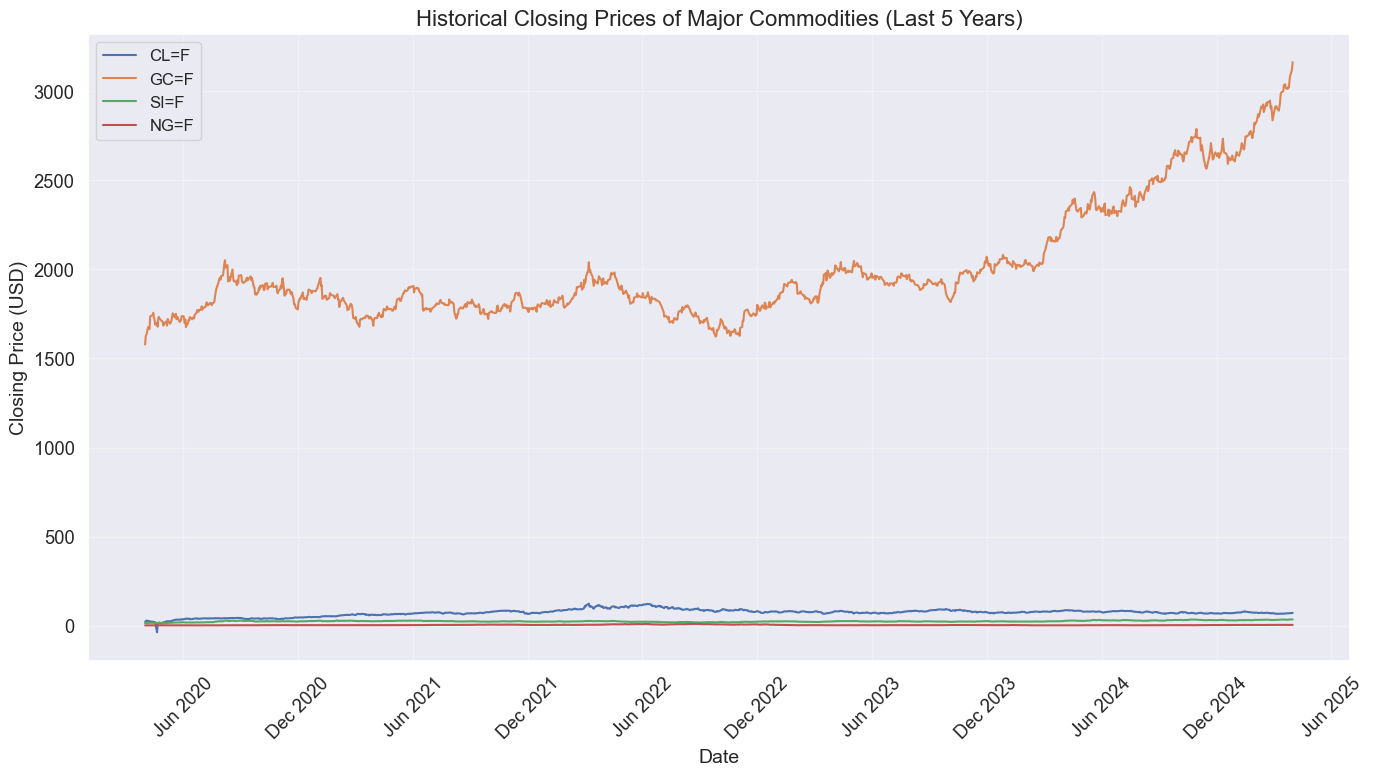

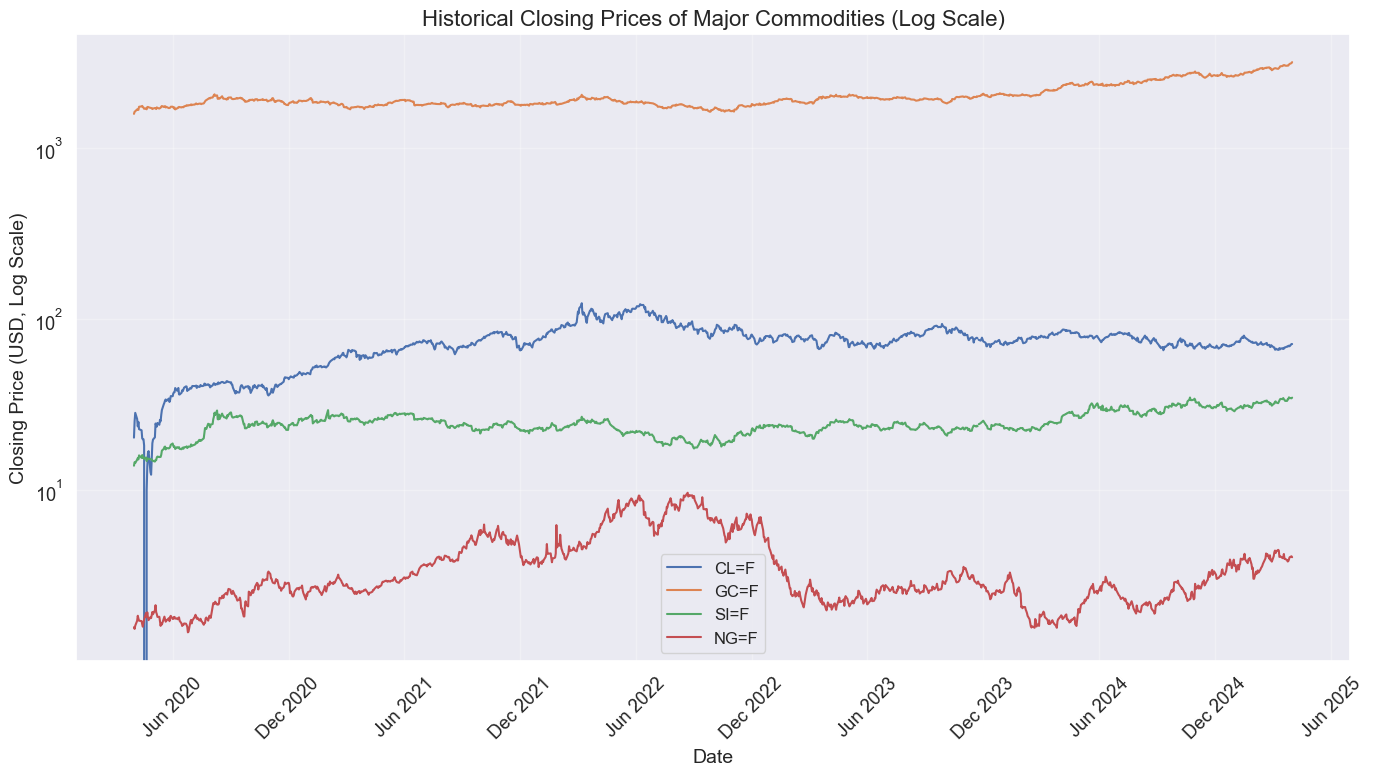

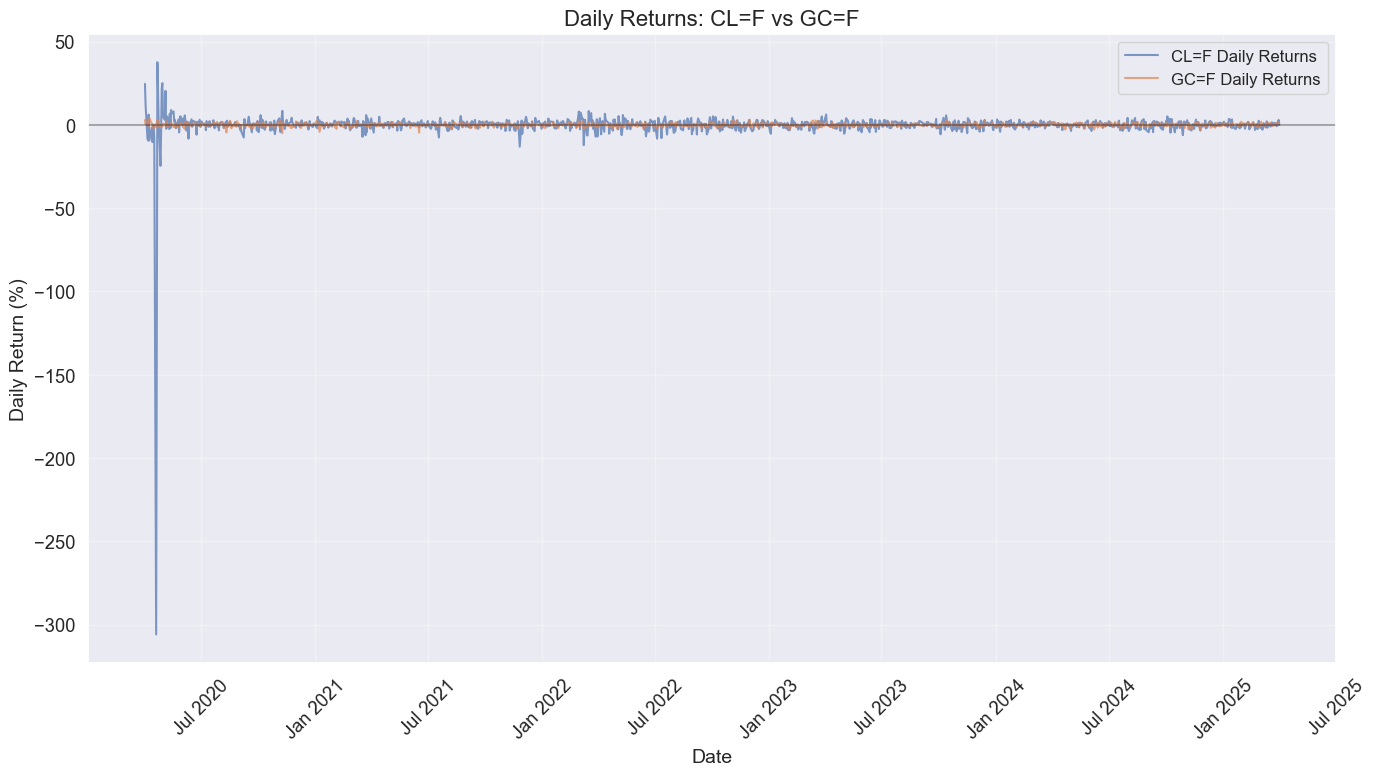

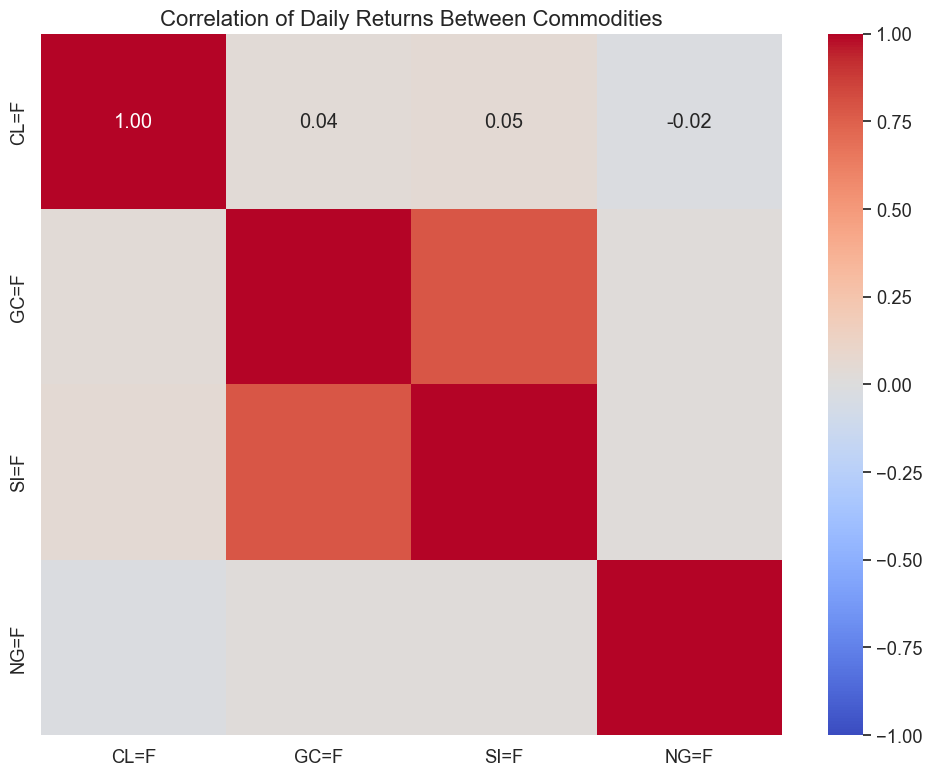

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set style for the plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# 1. Market Trend Analysis
# Load the dataset
print("Loading the dataset...")
df = pd.read_csv('Futures_Resources_Data.csv')

# Parse the Date column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Sort the data chronologically
df = df.sort_values('Date')

# Print dataset info
print(f"Dataset spans from {df['Date'].min().strftime('%d %b %Y')} to {df['Date'].max().strftime('%d %b %Y')}")
print(f"Number of records: {len(df)}")
print(f"Available commodities: {', '.join([col.split('_')[0] for col in df.columns if '_closing_price' in col])}")

# Select major commodities for analysis
# CL=F: Crude Oil
# GC=F: Gold
# SI=F: Silver
# NG=F: Natural Gas
commodities = ['CL=F', 'GC=F', 'SI=F', 'NG=F']
columns = [f"{commodity}_closing_price" for commodity in commodities]

# Filter for only the most recent 5 years of data to make the chart more readable
five_years_ago = df['Date'].max() - pd.DateOffset(years=5)
recent_data = df[df['Date'] >= five_years_ago].copy()

# Plot historical closing prices of major commodities
plt.figure(figsize=(14, 8))

for commodity, column in zip(commodities, columns):
    plt.plot(recent_data['Date'], recent_data[column], label=commodity)

plt.title('Historical Closing Prices of Major Commodities (Last 5 Years)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)

plt.tight_layout()


# Optional: Plot with log scale for better visibility of relative changes
plt.figure(figsize=(14, 8))

for commodity, column in zip(commodities, columns):
    plt.semilogy(recent_data['Date'], recent_data[column], label=commodity)

plt.title('Historical Closing Prices of Major Commodities (Log Scale)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD, Log Scale)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)

plt.tight_layout()


# 2. Daily Returns Calculation
print("\nCalculating daily returns...")

# Calculate daily percentage change (returns) for each commodity
for commodity in commodities:
    column = f"{commodity}_closing_price"
    return_col = f"{commodity}_daily_return"
    recent_data[return_col] = recent_data[column].pct_change() * 100

# Drop NaN values (first row has no return)
recent_data_returns = recent_data.dropna(subset=[f"{commodities[0]}_daily_return"])

# Plot daily returns for two commodities (Crude Oil and Gold)
plt.figure(figsize=(14, 8))

plt.plot(recent_data_returns['Date'], recent_data_returns[f"{commodities[0]}_daily_return"], 
         label=f"{commodities[0]} Daily Returns", alpha=0.7)
plt.plot(recent_data_returns['Date'], recent_data_returns[f"{commodities[1]}_daily_return"], 
         label=f"{commodities[1]} Daily Returns", alpha=0.7)

plt.title(f'Daily Returns: {commodities[0]} vs {commodities[1]}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()


# Create correlation heatmap of daily returns
plt.figure(figsize=(10, 8))

# Extract just the return columns for correlation analysis
return_columns = [f"{commodity}_daily_return" for commodity in commodities]
correlation_matrix = recent_data_returns[return_columns].corr()

# Rename columns and index for better readability
correlation_matrix.columns = commodities
correlation_matrix.index = commodities

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation of Daily Returns Between Commodities', fontsize=16)
plt.tight_layout()


# Calculate summary statistics for daily returns
return_stats = recent_data_returns[return_columns].describe().T
return_stats.index = commodities
print("\nSummary Statistics for Daily Returns:")
print(return_stats)

# Show all figures
plt.show() 

## EDA

Loading the dataset...

==== DATASET OVERVIEW ====
Dataset spans from 29 Oct 1997 to 01 Apr 2025
Total time period: 10016 days
Number of records: 6905

Available commodities: CL=F, BZ=F, GC=F, SI=F, NG=F, ZC=F, ZW=F, ZS=F, HG=F, PL=F, PA=F

==== DATA COMPLETENESS ====
Data completeness by commodity (% of days with values):
  PA=F: 89.91%
  PL=F: 89.73%
  ZW=F: 89.69%
  ZC=F: 89.51%
  CL=F: 89.46%
  NG=F: 89.41%
  ZS=F: 89.40%
  HG=F: 89.40%
  SI=F: 89.36%
  GC=F: 89.33%
  BZ=F: 63.65%

Data availability timeline:
  CL=F: First appearance: 23 Aug 2000, Consistent data from: 04 Oct 2000
  BZ=F: First appearance: 30 Jul 2007, Consistent data from: 10 Sep 2007
  GC=F: First appearance: 30 Aug 2000, Consistent data from: 11 Oct 2000
  SI=F: First appearance: 30 Aug 2000, Consistent data from: 11 Oct 2000
  NG=F: First appearance: 30 Aug 2000, Consistent data from: 11 Oct 2000
  ZC=F: First appearance: 17 Jul 2000, Consistent data from: 25 Aug 2000
  ZW=F: First appearance: 17 Jul 2000, Cons

<Figure size 1200x800 with 0 Axes>

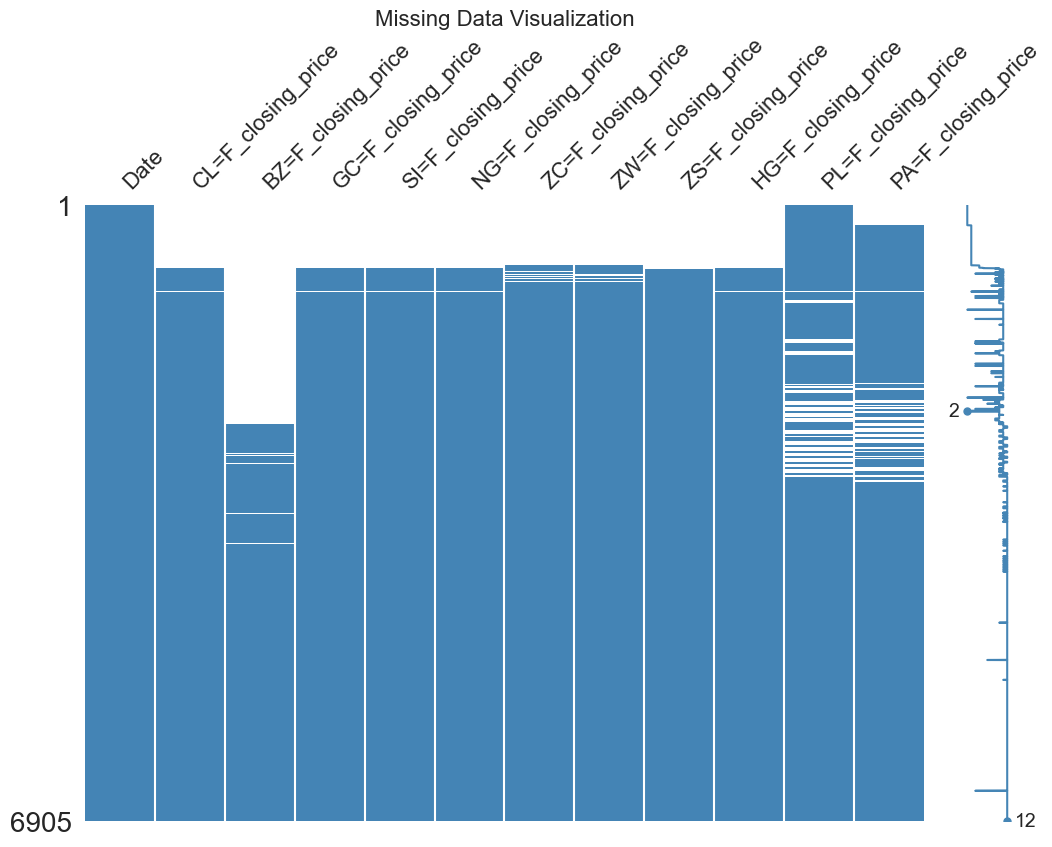

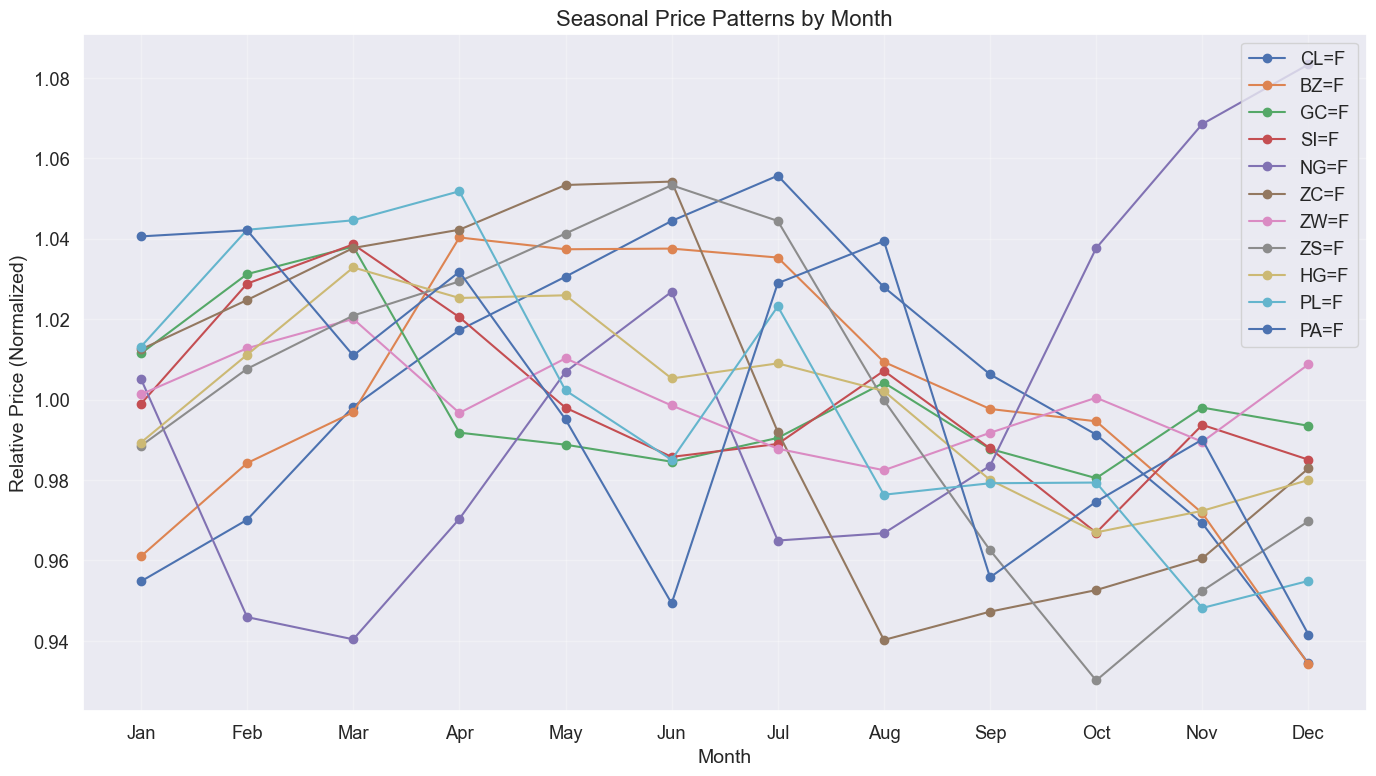

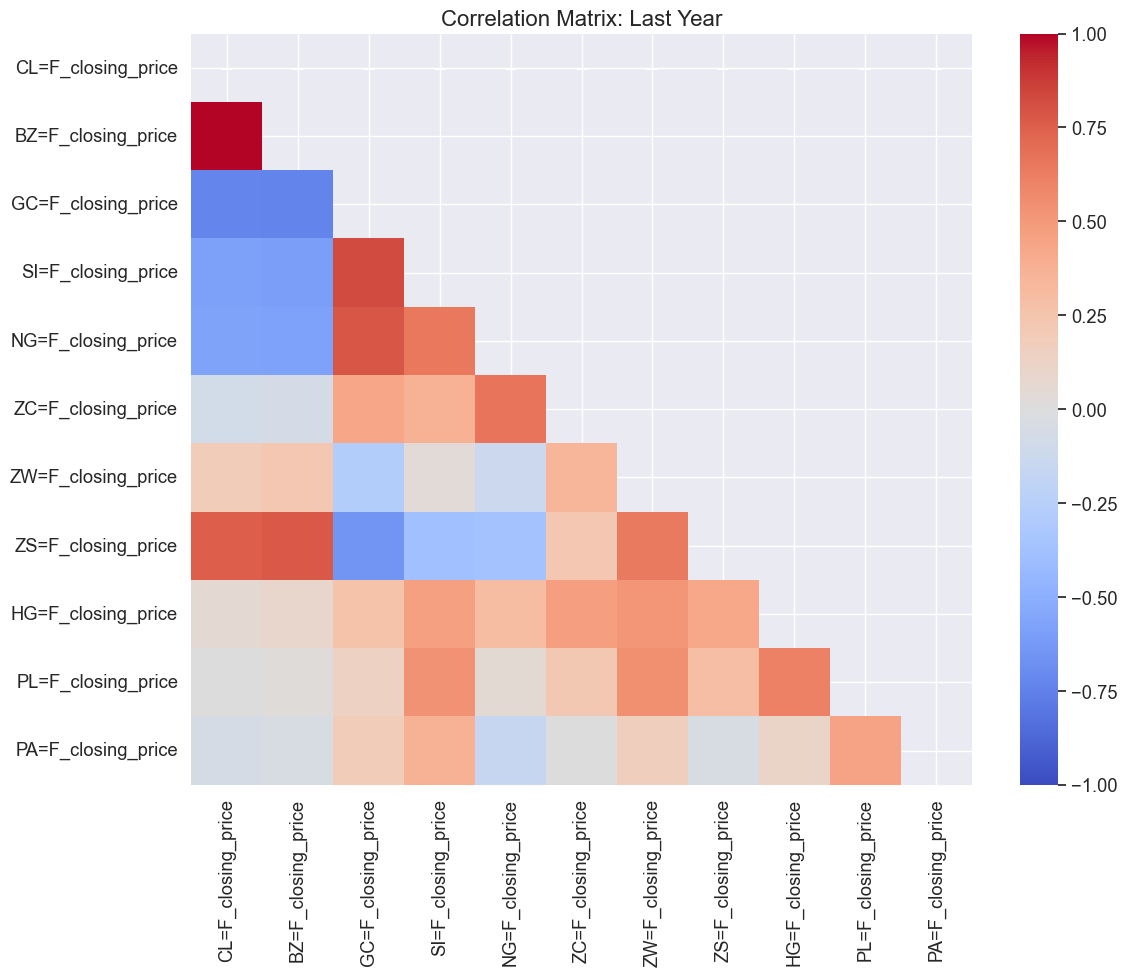

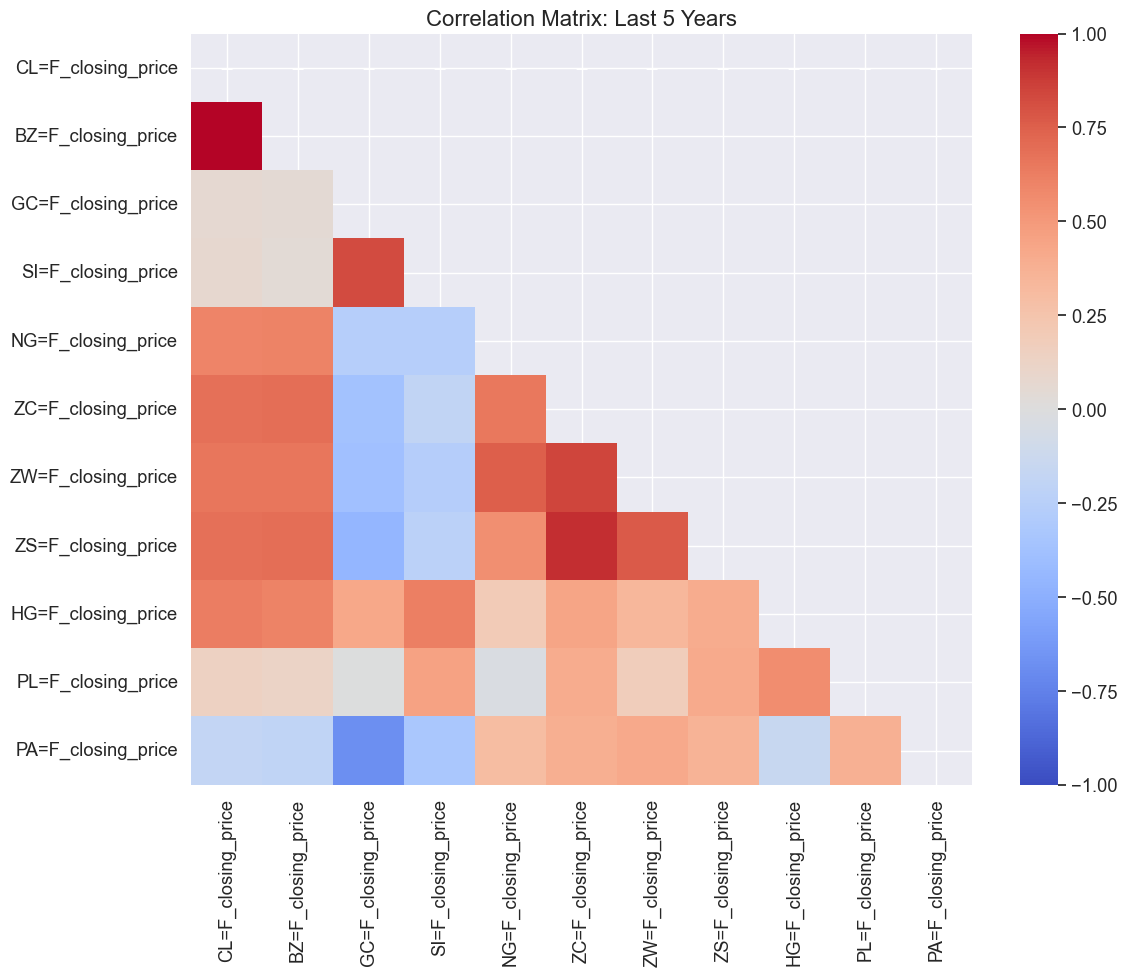

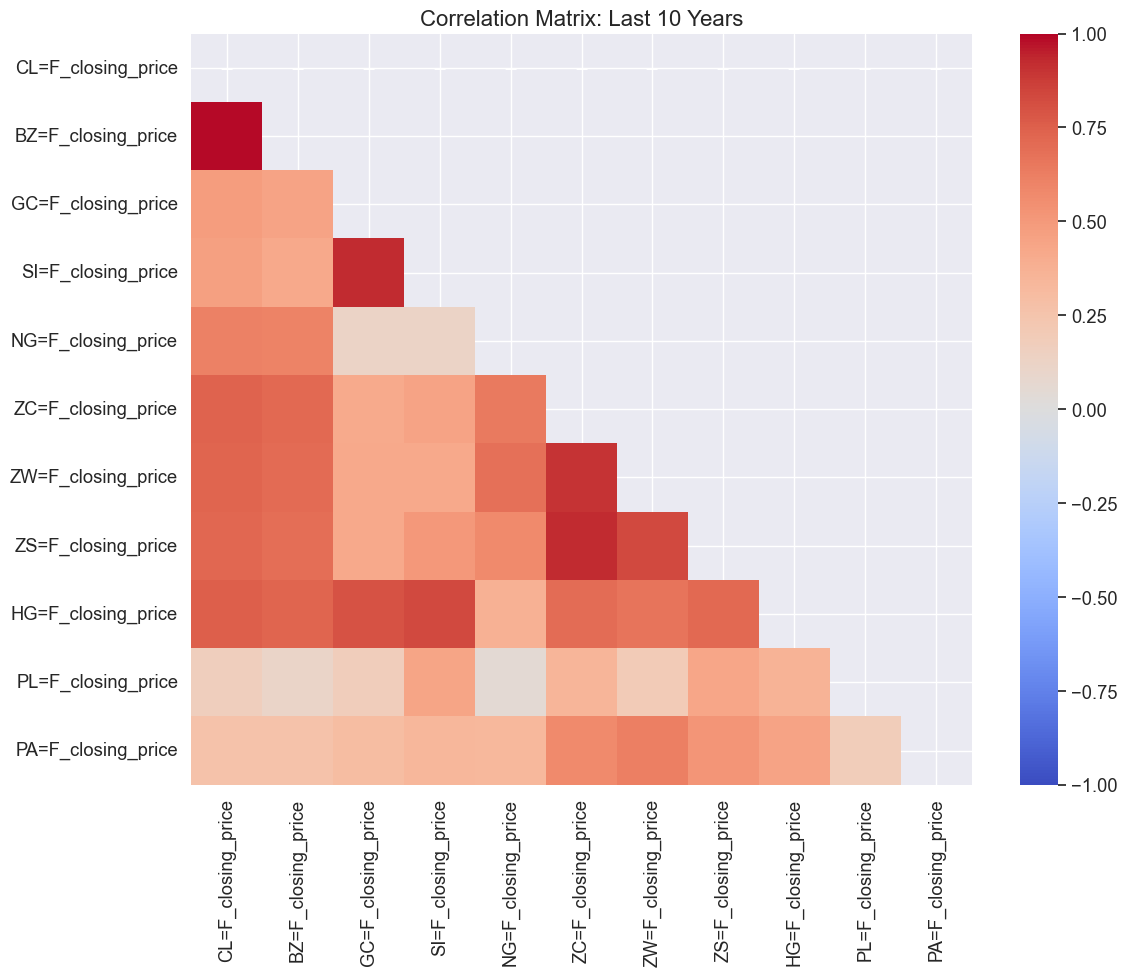

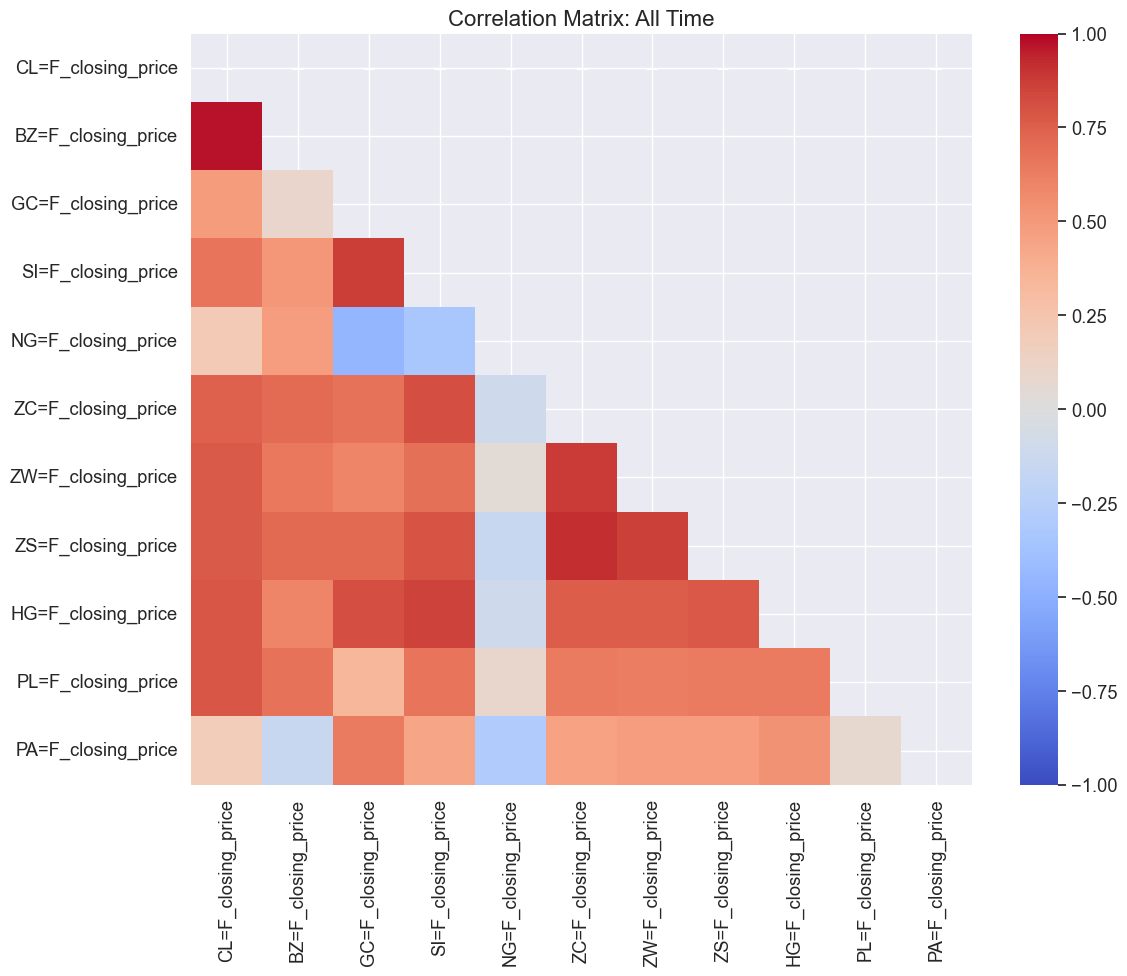

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno

# Set style for the plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Load and prepare the dataset
print("Loading the dataset...")
df = pd.read_csv('Futures_Resources_Data.csv')

# Parse the Date column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Sort the data chronologically
df = df.sort_values('Date')

# 1. Basic Dataset Information
print("\n==== DATASET OVERVIEW ====")
print(f"Dataset spans from {df['Date'].min().strftime('%d %b %Y')} to {df['Date'].max().strftime('%d %b %Y')}")
print(f"Total time period: {(df['Date'].max() - df['Date'].min()).days} days")
print(f"Number of records: {len(df)}")

# List all commodities
commodity_columns = [col for col in df.columns if '_closing_price' in col]
commodities = [col.split('_')[0] for col in commodity_columns]
print(f"\nAvailable commodities: {', '.join(commodities)}")

# 2. Data Completeness Analysis
print("\n==== DATA COMPLETENESS ====")
# Calculate the percentage of non-null values for each commodity
completeness = df[commodity_columns].notna().mean() * 100
completeness = completeness.sort_values(ascending=False)

print("Data completeness by commodity (% of days with values):")
for col, pct in completeness.items():
    print(f"  {col.split('_')[0]}: {pct:.2f}%")

# Visualize missing data patterns
plt.figure(figsize=(12, 8))
msno.matrix(df[['Date'] + commodity_columns], figsize=(12, 8), color=(0.27, 0.52, 0.71))
plt.title('Missing Data Visualization', fontsize=16)
plt.tight_layout()


# 3. Time Series Completeness
# When did each commodity start having consistent data?
first_appearance = {}
for col in commodity_columns:
    # Find the first non-null value
    first_date = df[df[col].notna()]['Date'].min()
    # Find the date when values become consistent (less than 5% missing in the future)
    consistent_data = df[df['Date'] >= first_date].copy()
    rolling_completeness = consistent_data[col].notna().rolling(window=30).mean()
    try:
        consistent_start = consistent_data.loc[rolling_completeness >= 0.95, 'Date'].min()
        first_appearance[col.split('_')[0]] = {
            'first_value': first_date,
            'consistent_data': consistent_start
        }
    except:
        first_appearance[col.split('_')[0]] = {
            'first_value': first_date,
            'consistent_data': "Never consistently present"
        }

print("\nData availability timeline:")
for commodity, dates in first_appearance.items():
    first = dates['first_value'].strftime('%d %b %Y') if isinstance(dates['first_value'], pd.Timestamp) else "N/A"
    consistent = dates['consistent_data'].strftime('%d %b %Y') if isinstance(dates['consistent_data'], pd.Timestamp) else dates['consistent_data']
    print(f"  {commodity}: First appearance: {first}, Consistent data from: {consistent}")

# 4. Statistical Summary of Closing Prices
print("\n==== STATISTICAL SUMMARY ====")
# Calculate basic statistics for each commodity
stats = df[commodity_columns].describe().T
stats['missing_pct'] = (1 - df[commodity_columns].count() / len(df)) * 100
stats.index = [col.split('_')[0] for col in stats.index]
print("\nStatistical summary of closing prices:")
print(stats)

# 5. Volatility Analysis
print("\n==== VOLATILITY ANALYSIS ====")
# Calculate the coefficient of variation for each commodity
# Use the last 5 years of data to focus on more recent trends
five_years_ago = df['Date'].max() - pd.DateOffset(years=5)
recent_data = df[df['Date'] >= five_years_ago].copy()

volatility = {}
for col in commodity_columns:
    commodity = col.split('_')[0]
    # Calculate daily returns
    returns = recent_data[col].pct_change().dropna()
    
    if not returns.empty:
        # Coefficient of variation (standardized measure of dispersion)
        cv = returns.std() / abs(returns.mean()) if returns.mean() != 0 else float('inf')
        # Average absolute daily change
        avg_abs_change = returns.abs().mean()
        # Max drawdown (maximum % loss from a peak)
        cumulative = (1 + returns).cumprod()
        max_drawdown = (cumulative / cumulative.cummax() - 1).min()
        
        volatility[commodity] = {
            'cv': cv,
            'avg_daily_change': avg_abs_change * 100,  # as percentage
            'max_drawdown': max_drawdown * 100  # as percentage
        }

# Sort commodities by volatility
sorted_volatility = sorted(volatility.items(), key=lambda x: x[1]['cv'], reverse=True)

print("Volatility measures (last 5 years, most volatile first):")
for commodity, metrics in sorted_volatility:
    print(f"  {commodity}: CV: {metrics['cv']:.2f}, Avg Daily Change: {metrics['avg_daily_change']:.2f}%, "
          f"Max Drawdown: {metrics['max_drawdown']:.2f}%")

# 6. Seasonality Analysis
print("\n==== SEASONALITY ANALYSIS ====")
# Extract month from the date
df['Month'] = df['Date'].dt.month

# For each commodity, calculate average price by month
seasonal_patterns = {}
for col in commodity_columns:
    commodity = col.split('_')[0]
    
    # Skip commodities with too many missing values
    if df[col].isna().mean() > 0.5:
        continue
    
    # Group by month and calculate mean price
    monthly_avg = df.groupby('Month')[col].mean()
    if not monthly_avg.empty and not monthly_avg.isna().all():
        # Normalize to show relative seasonal changes
        normalized = monthly_avg / monthly_avg.mean()
        seasonal_patterns[commodity] = normalized

# Visualize seasonal patterns
if seasonal_patterns:
    plt.figure(figsize=(14, 8))
    for commodity, pattern in seasonal_patterns.items():
        plt.plot(pattern.index, pattern.values, marker='o', label=commodity)
    
    plt.title('Seasonal Price Patterns by Month', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Relative Price (Normalized)', fontsize=14)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    

# 7. Correlation Over Time Analysis
print("\n==== CORRELATION OVER TIME ====")
# Analyze how correlations have changed over time
# Use 1-year rolling windows

# Function to calculate correlation matrix for a time period
def get_correlation_for_period(start_date, end_date):
    period_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    return period_data[commodity_columns].corr()

# Calculate correlations for different time periods
time_periods = [
    ("Last Year", df['Date'].max() - pd.DateOffset(years=1), df['Date'].max()),
    ("Last 5 Years", df['Date'].max() - pd.DateOffset(years=5), df['Date'].max()),
    ("Last 10 Years", df['Date'].max() - pd.DateOffset(years=10), df['Date'].max()),
    ("All Time", df['Date'].min(), df['Date'].max())
]

print("Correlation analysis across different time periods:")
for period_name, start_date, end_date in time_periods:
    print(f"\n{period_name} correlation matrix:")
    try:
        corr_matrix = get_correlation_for_period(start_date, end_date)
        # Only show the upper triangle of the correlation matrix to avoid redundancy
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                    mask=mask, vmin=-1, vmax=1)
        plt.title(f'Correlation Matrix: {period_name}', fontsize=16)
        plt.tight_layout()
        
    except Exception as e:
        print(f"Could not calculate correlation for {period_name}: {str(e)}")

print("\nEDA complete! Check the generated visualizations for deeper insights.")

# Show all figures
plt.show() 

## Commodoty Forecasting

Loading the dataset...
Available commodities: CL=F, BZ=F, GC=F, SI=F, NG=F, ZC=F, ZW=F, ZS=F, HG=F, PL=F, PA=F

Performing time series analysis on GC=F
Analysis period: 30 Mar 2020 to 01 Apr 2025
Number of data points: 1260

Decomposing time series into trend, seasonal, and residual components...

Analyzing autocorrelation patterns...
Using 30 lags for ACF/PACF analysis (data size: 62 months)

Building ARIMA forecast model...
Training data: 31 Mar 2020 to 31 Mar 2024
Testing data: 30 Apr 2024 to 30 Apr 2025
Fitting ARIMA model...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:     GC=F_closing_price   No. Observations:                   49
Model:                 ARIMA(1, 1,

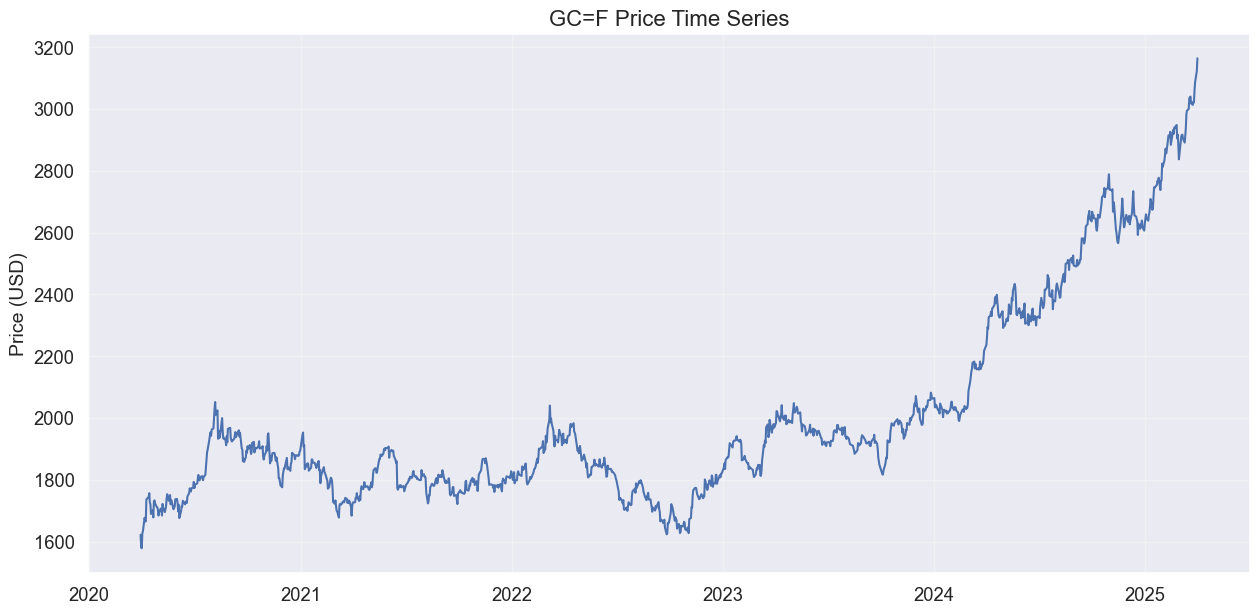

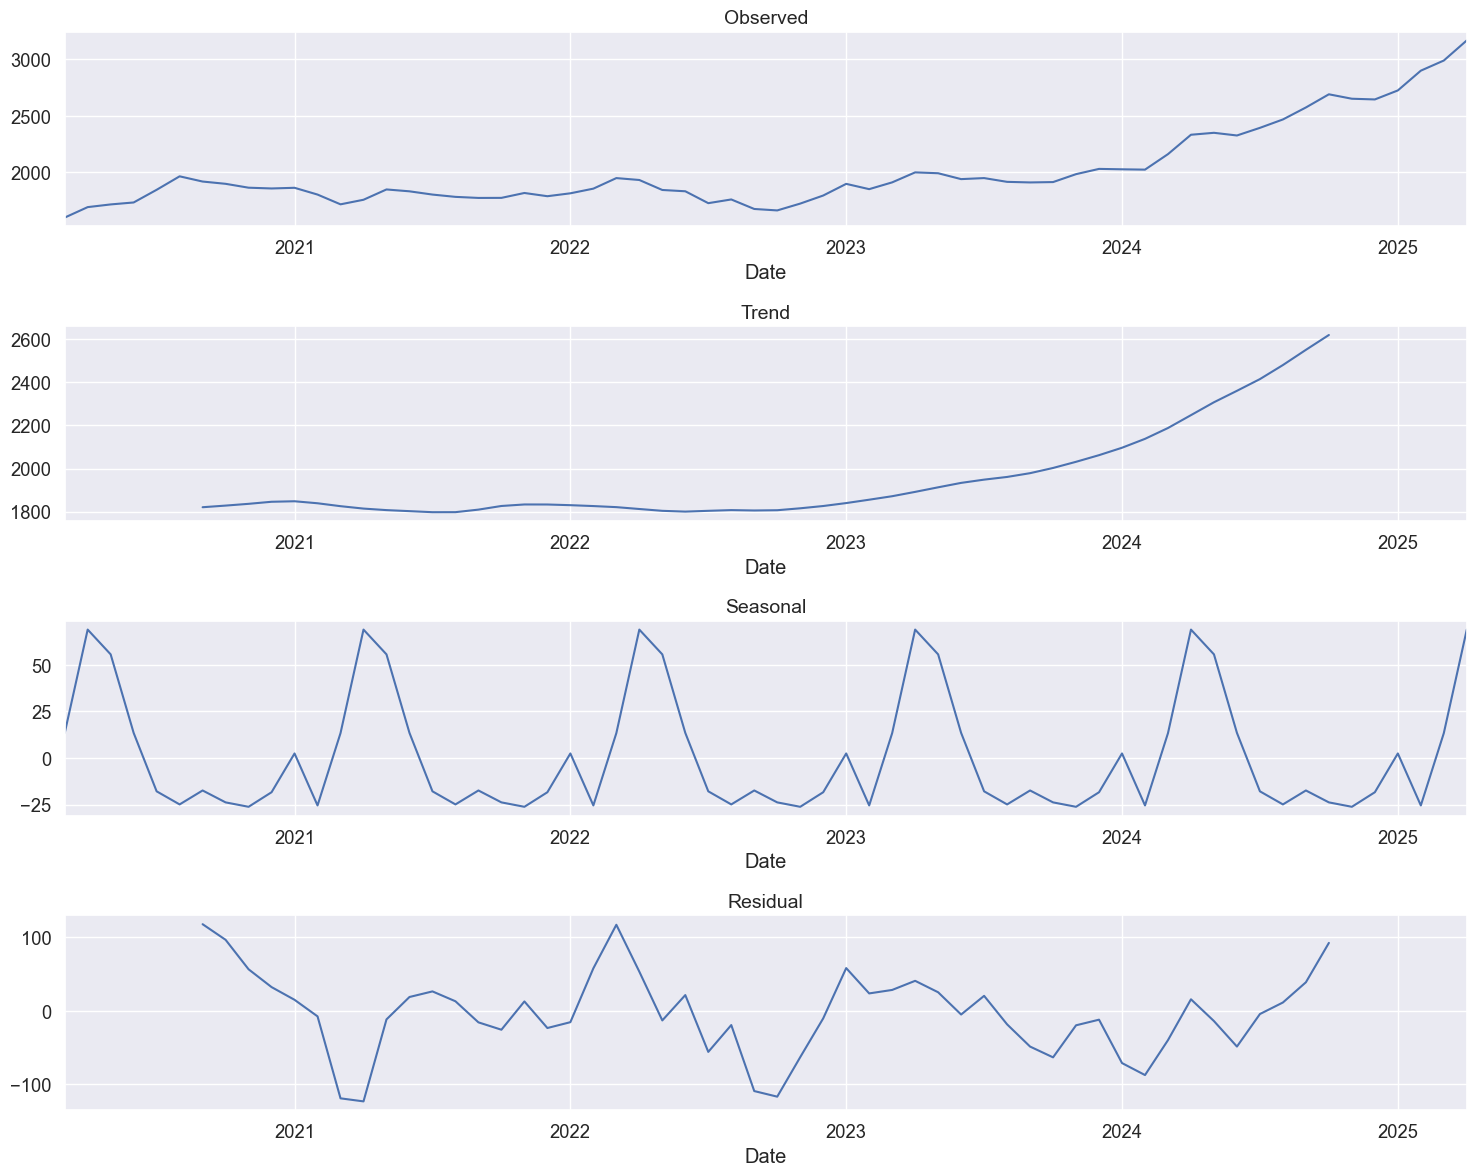

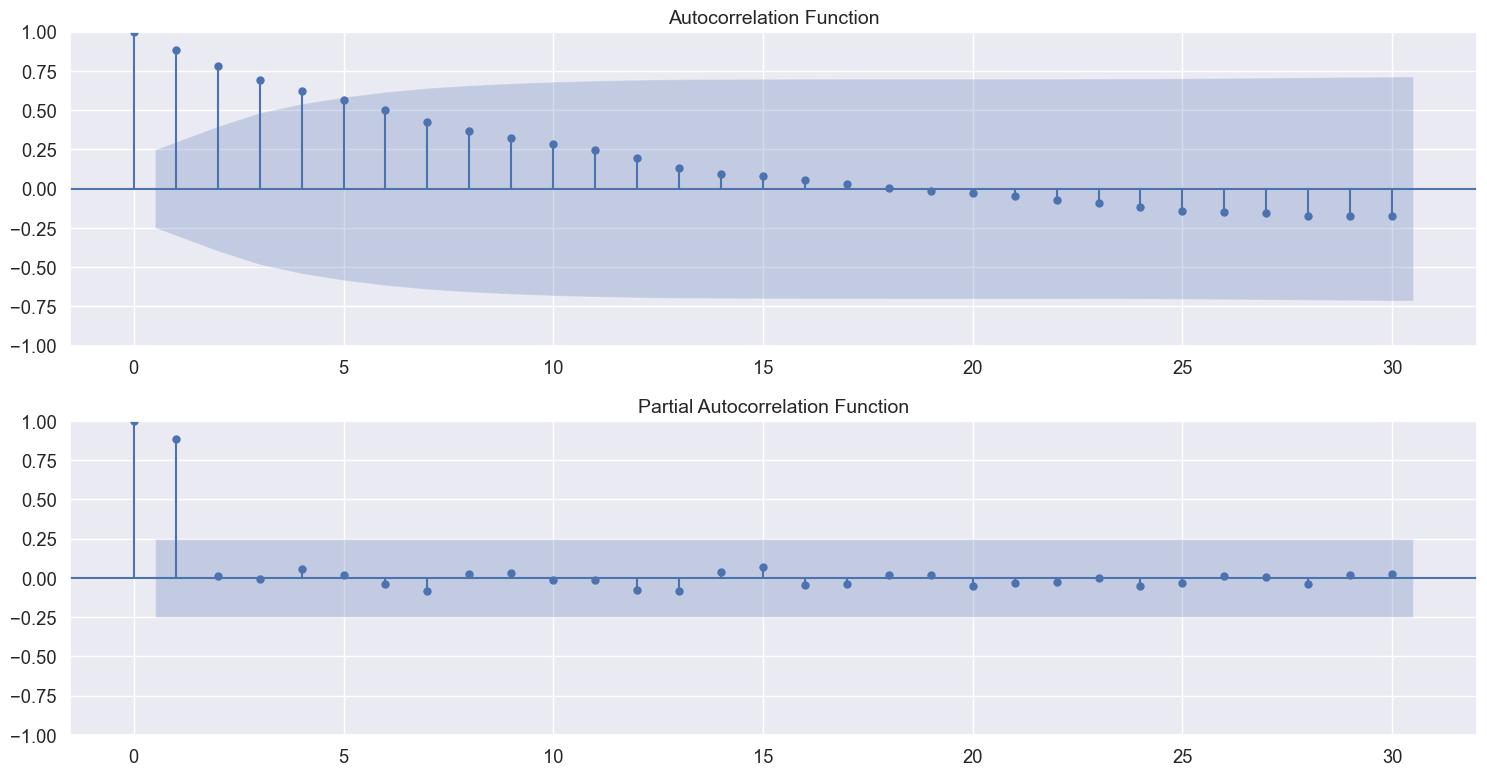

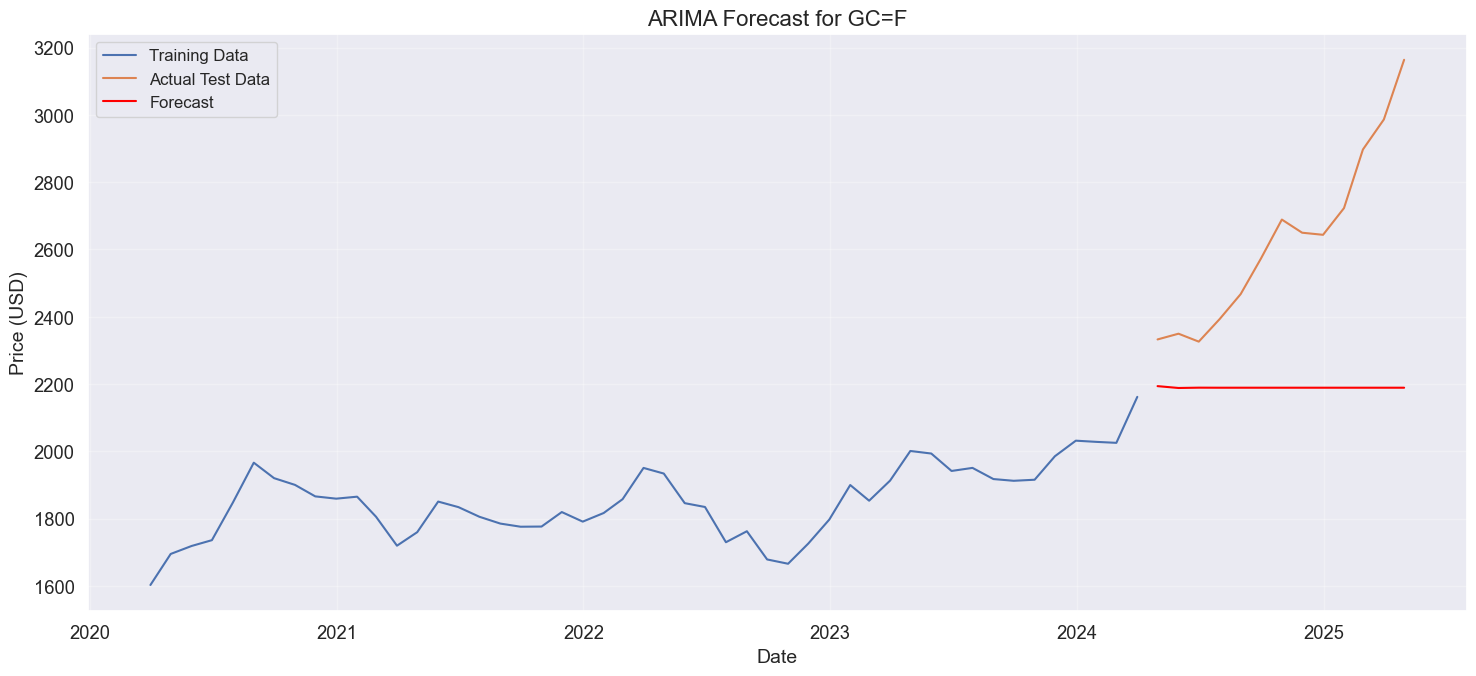

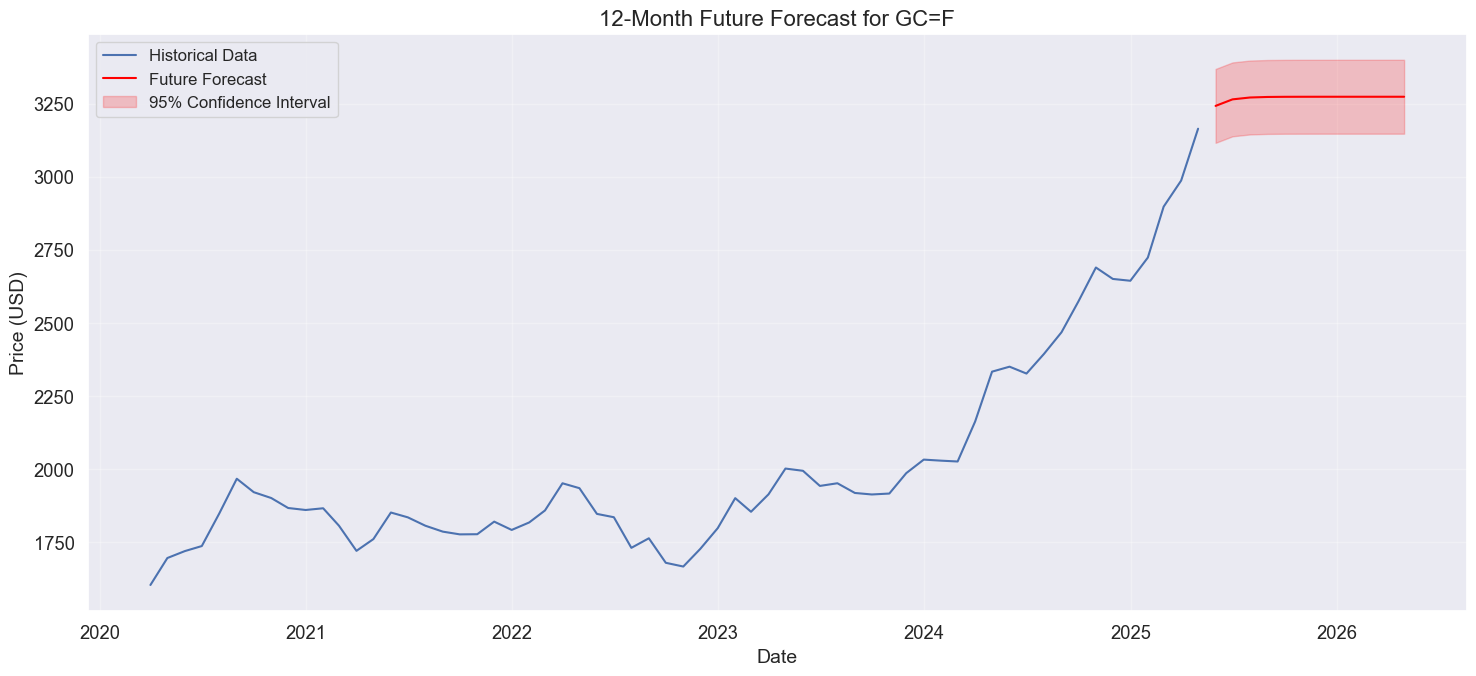

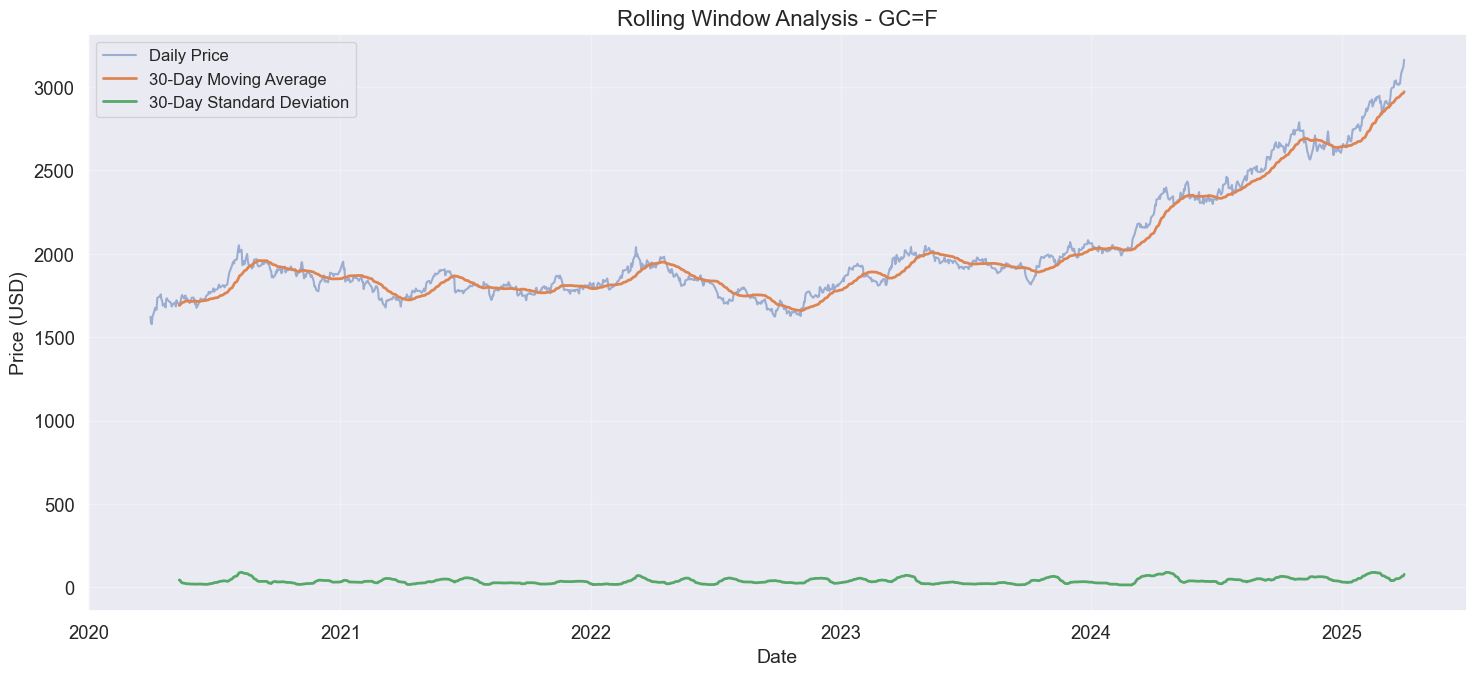

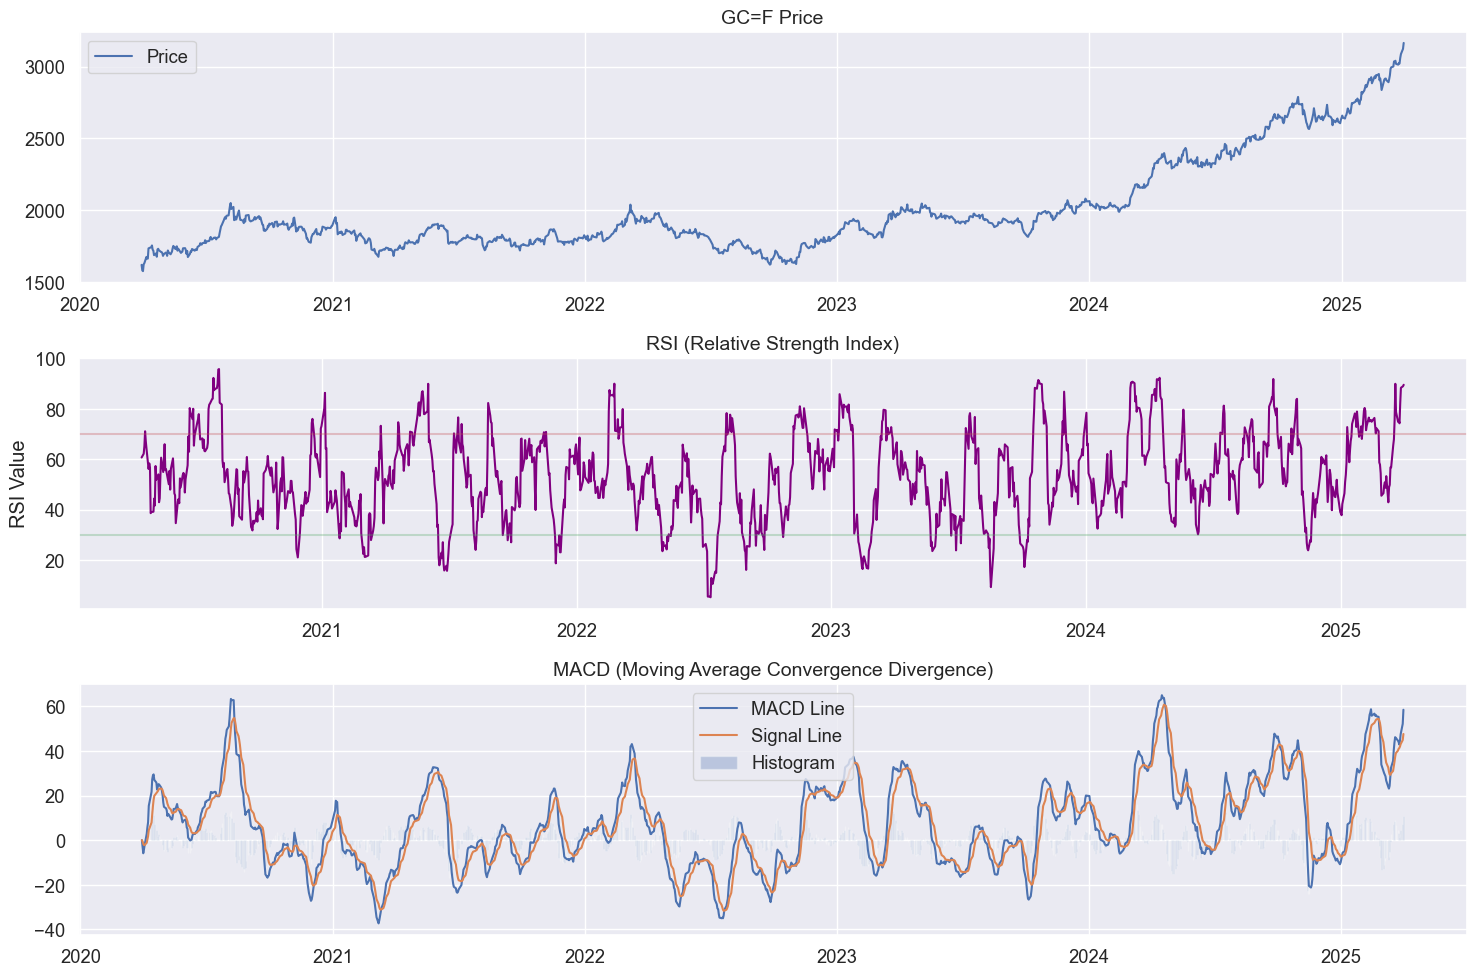

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Load the dataset
print("Loading the dataset...")
df = pd.read_csv('Futures_Resources_Data.csv')

# Parse the Date column and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df = df.sort_values('Date')

# List available commodities
commodity_columns = [col for col in df.columns if '_closing_price' in col]
commodities = [col.split('_')[0] for col in commodity_columns]
print(f"Available commodities: {', '.join(commodities)}")

# For demonstration, we'll focus on gold (GC=F) as it typically has good data quality
target_commodity = 'GC=F_closing_price'
print(f"\nPerforming time series analysis on {target_commodity.split('_')[0]}")

# Get data for the selected commodity
commodity_data = df[['Date', target_commodity]].copy()
commodity_data = commodity_data.dropna()
commodity_data.set_index('Date', inplace=True)

# If we have enough data, focus on the last 5 years
if len(commodity_data) > 5*252:  # Approx 252 trading days per year
    start_date = commodity_data.index[-5*252]
    commodity_data = commodity_data[commodity_data.index >= start_date]

print(f"Analysis period: {commodity_data.index.min().strftime('%d %b %Y')} to {commodity_data.index.max().strftime('%d %b %Y')}")
print(f"Number of data points: {len(commodity_data)}")

# 1. Visualize the time series
plt.figure(figsize=(15, 7))
plt.plot(commodity_data)
plt.title(f'{target_commodity.split("_")[0]} Price Time Series', fontsize=16)
plt.grid(True, alpha=0.3)
plt.ylabel('Price (USD)', fontsize=14)


# 2. Decompose the time series to trend, seasonal, and residual components
print("\nDecomposing time series into trend, seasonal, and residual components...")
# Resample to monthly data for clearer seasonality patterns
monthly_data = commodity_data.resample('M').mean()

# Perform decomposition
decomposition = seasonal_decompose(monthly_data, model='additive', period=12)

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed', fontsize=14)
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend', fontsize=14)
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal', fontsize=14)
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual', fontsize=14)
plt.tight_layout()


# 3. Autocorrelation and Partial Autocorrelation Analysis
print("\nAnalyzing autocorrelation patterns...")
# Calculate maximum allowable lags (up to 50% of sample size)
max_lags = len(monthly_data) // 2 - 1

# Use the calculated max_lags value (or a sensible default if sample is very small)
lags_to_use = min(max(max_lags, 12), 36)  # At least 12, at most 36 lags
print(f"Using {lags_to_use} lags for ACF/PACF analysis (data size: {len(monthly_data)} months)")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
plot_acf(monthly_data, ax=ax1, lags=lags_to_use)
ax1.set_title('Autocorrelation Function', fontsize=14)
plot_pacf(monthly_data, ax=ax2, lags=lags_to_use)
ax2.set_title('Partial Autocorrelation Function', fontsize=14)
plt.tight_layout()


# 4. ARIMA Modeling and Forecasting
print("\nBuilding ARIMA forecast model...")
# Split data into train and test
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[0:train_size], monthly_data[train_size:]
print(f"Training data: {train.index.min().strftime('%d %b %Y')} to {train.index.max().strftime('%d %b %Y')}")
print(f"Testing data: {test.index.min().strftime('%d %b %Y')} to {test.index.max().strftime('%d %b %Y')}")

# Fit ARIMA model - using auto_arima would be better but keeping it simple
# Parameters (p,d,q) = (1,1,1) is just a starting point
print("Fitting ARIMA model...")
try:
    model = ARIMA(train, order=(1,1,1))
    model_fit = model.fit()
    print("\nARIMA Model Summary:")
    print(model_fit.summary())
    
    # Forecast
    forecast_steps = len(test)
    forecast = model_fit.forecast(steps=forecast_steps)
    forecast_index = test.index
    
    # Calculate forecast error metrics
    # Make sure test and forecast have the same shape for calculations
    test_values = test.values.flatten()
    forecast_values = forecast
    
    # Check if lengths match
    if len(test_values) != len(forecast_values):
        print(f"Warning: Test data length ({len(test_values)}) doesn't match forecast length ({len(forecast_values)})")
        # Trim to the shorter length
        min_length = min(len(test_values), len(forecast_values))
        test_values = test_values[:min_length]
        forecast_values = forecast_values[:min_length]
    
    # Calculate metrics
    rmse = sqrt(mean_squared_error(test_values, forecast_values))
    # Safely calculate MAPE avoiding division by zero
    mape = np.mean(np.abs((test_values - forecast_values) / np.where(test_values != 0, test_values, 1))) * 100
    print(f"\nForecast Error Metrics:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    # Plot forecast vs actual
    plt.figure(figsize=(15, 7))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Actual Test Data')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.title(f'ARIMA Forecast for {target_commodity.split("_")[0]}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    
except Exception as e:
    print(f"Error in ARIMA modeling: {str(e)}")
    print("Trying a simpler model configuration...")
    
    # Try a simpler model
    try:
        model = ARIMA(train, order=(1,1,0))  # Simpler model without MA term
        model_fit = model.fit()
        
        # Continue with forecasting using the simpler model
        forecast = model_fit.forecast(steps=len(test))
        
        # Add a note to the plot title
        simple_title = f'Simple ARIMA(1,1,0) Forecast for {target_commodity.split("_")[0]}'
        # ... rest of plotting code here
        
    except Exception as e2:
        print(f"Even simple model failed: {str(e2)}")
        print("Proceeding with analysis without ARIMA forecasting.")
        # Set a flag to skip forecasting steps that depend on this model
        forecast_failed = True

# Initialize forecast_failed flag
forecast_failed = False

# 5. Future Forecast
print("\nGenerating future forecast...")

# Only proceed if the previous forecasting didn't fail
if not forecast_failed:
    try:
        # Fit model on all data
        full_model = ARIMA(monthly_data, order=(1,1,1))
        full_model_fit = full_model.fit()
        
        # Forecast 12 months into the future
        future_steps = 12
        future_forecast = full_model_fit.forecast(steps=future_steps)
        
        # Create future date index
        last_date = monthly_data.index[-1]
        future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='M')
        
        # Plot historical data and future forecast
        plt.figure(figsize=(15, 7))
        plt.plot(monthly_data.index, monthly_data, label='Historical Data')
        plt.plot(future_dates, future_forecast, label='Future Forecast', color='red')
        
        # Add confidence intervals (just an approximation)
        forecast_stderr = np.sqrt(full_model_fit.params['sigma2'])
        conf_int_lower = future_forecast - 1.96 * forecast_stderr
        conf_int_upper = future_forecast + 1.96 * forecast_stderr
        plt.fill_between(future_dates, conf_int_lower, conf_int_upper, color='red', alpha=0.2, label='95% Confidence Interval')
        
        plt.title(f'12-Month Future Forecast for {target_commodity.split("_")[0]}', fontsize=16)
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Price (USD)', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
    except Exception as e:
        print(f"Error generating future forecast: {str(e)}")
        forecast_failed = True
else:
    print("Skipping future forecast generation due to previous errors.")

# 6. Rolling Window Analysis - this doesn't depend on forecasting
print("\nPerforming rolling window analysis...")
try:
    window_size = 30  # 30-day rolling window
    rolling_mean = commodity_data.rolling(window=window_size).mean()
    rolling_std = commodity_data.rolling(window=window_size).std()
    
    plt.figure(figsize=(15, 7))
    plt.plot(commodity_data, label='Daily Price', alpha=0.5)
    plt.plot(rolling_mean, label=f'{window_size}-Day Moving Average', linewidth=2)
    plt.plot(rolling_std, label=f'{window_size}-Day Standard Deviation', linewidth=2)
    plt.title(f'Rolling Window Analysis - {target_commodity.split("_")[0]}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
except Exception as e:
    print(f"Error in rolling window analysis: {str(e)}")

# 7. Technical Indicators - these don't depend on forecasting
print("\nCalculating technical indicators...")
try:
    # Calculate some common technical indicators
    # 1. RSI (Relative Strength Index)
    def calculate_rsi(series, period=14):
        delta = series.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss.replace(0, np.finfo(float).eps)  # Avoid division by zero
        return 100 - (100 / (1 + rs))
    
    # 2. MACD (Moving Average Convergence Divergence)
    def calculate_macd(series, fast_period=12, slow_period=26, signal_period=9):
        fast_ema = series.ewm(span=fast_period, adjust=False).mean()
        slow_ema = series.ewm(span=slow_period, adjust=False).mean()
        macd_line = fast_ema - slow_ema
        signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
        macd_histogram = macd_line - signal_line
        return macd_line, signal_line, macd_histogram
    
    # Calculate indicators
    commodity_data['RSI'] = calculate_rsi(commodity_data[target_commodity])
    macd_line, signal_line, macd_histogram = calculate_macd(commodity_data[target_commodity])
    commodity_data['MACD'] = macd_line
    commodity_data['MACD_Signal'] = signal_line
    commodity_data['MACD_Histogram'] = macd_histogram
    
    # Plot RSI
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    plt.plot(commodity_data[target_commodity], label='Price')
    plt.title(f'{target_commodity.split("_")[0]} Price', fontsize=14)
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(commodity_data['RSI'], color='purple')
    plt.axhline(y=70, color='r', linestyle='-', alpha=0.3)
    plt.axhline(y=30, color='g', linestyle='-', alpha=0.3)
    plt.title('RSI (Relative Strength Index)', fontsize=14)
    plt.ylabel('RSI Value')
    
    plt.subplot(3, 1, 3)
    plt.plot(commodity_data['MACD'], label='MACD Line')
    plt.plot(commodity_data['MACD_Signal'], label='Signal Line')
    plt.bar(commodity_data.index, commodity_data['MACD_Histogram'], label='Histogram', alpha=0.3)
    plt.title('MACD (Moving Average Convergence Divergence)', fontsize=14)
    plt.legend()
    
    plt.tight_layout()
    
except Exception as e:
    print(f"Error calculating technical indicators: {str(e)}")

print("\nForecasting analysis complete! Check the generated visualizations for insights.")

# Show all figures
plt.show() 

## Imporved Forecasting

Loading the dataset...

Performing advanced time series analysis on GC=F
Analysis period: 24 Mar 2015 to 01 Apr 2025
Number of data points: 2520
Using 122 months of data for analysis

Decomposing gold price time series...
Training data: 31 Mar 2015 to 31 Mar 2023
Testing data: 30 Apr 2023 to 30 Apr 2025

Fitting and evaluating forecasting models...
Fitting ARIMA(1,1,1)...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
  RMSE: 541.20, MAPE: 15.07%
Fitting SARIMA(1,1,1)x(1,0,1,12)...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
  RMSE: 563.43, MAPE: 16.28%
Fitting SARIMA(1,1,1)x(0,1,1,12

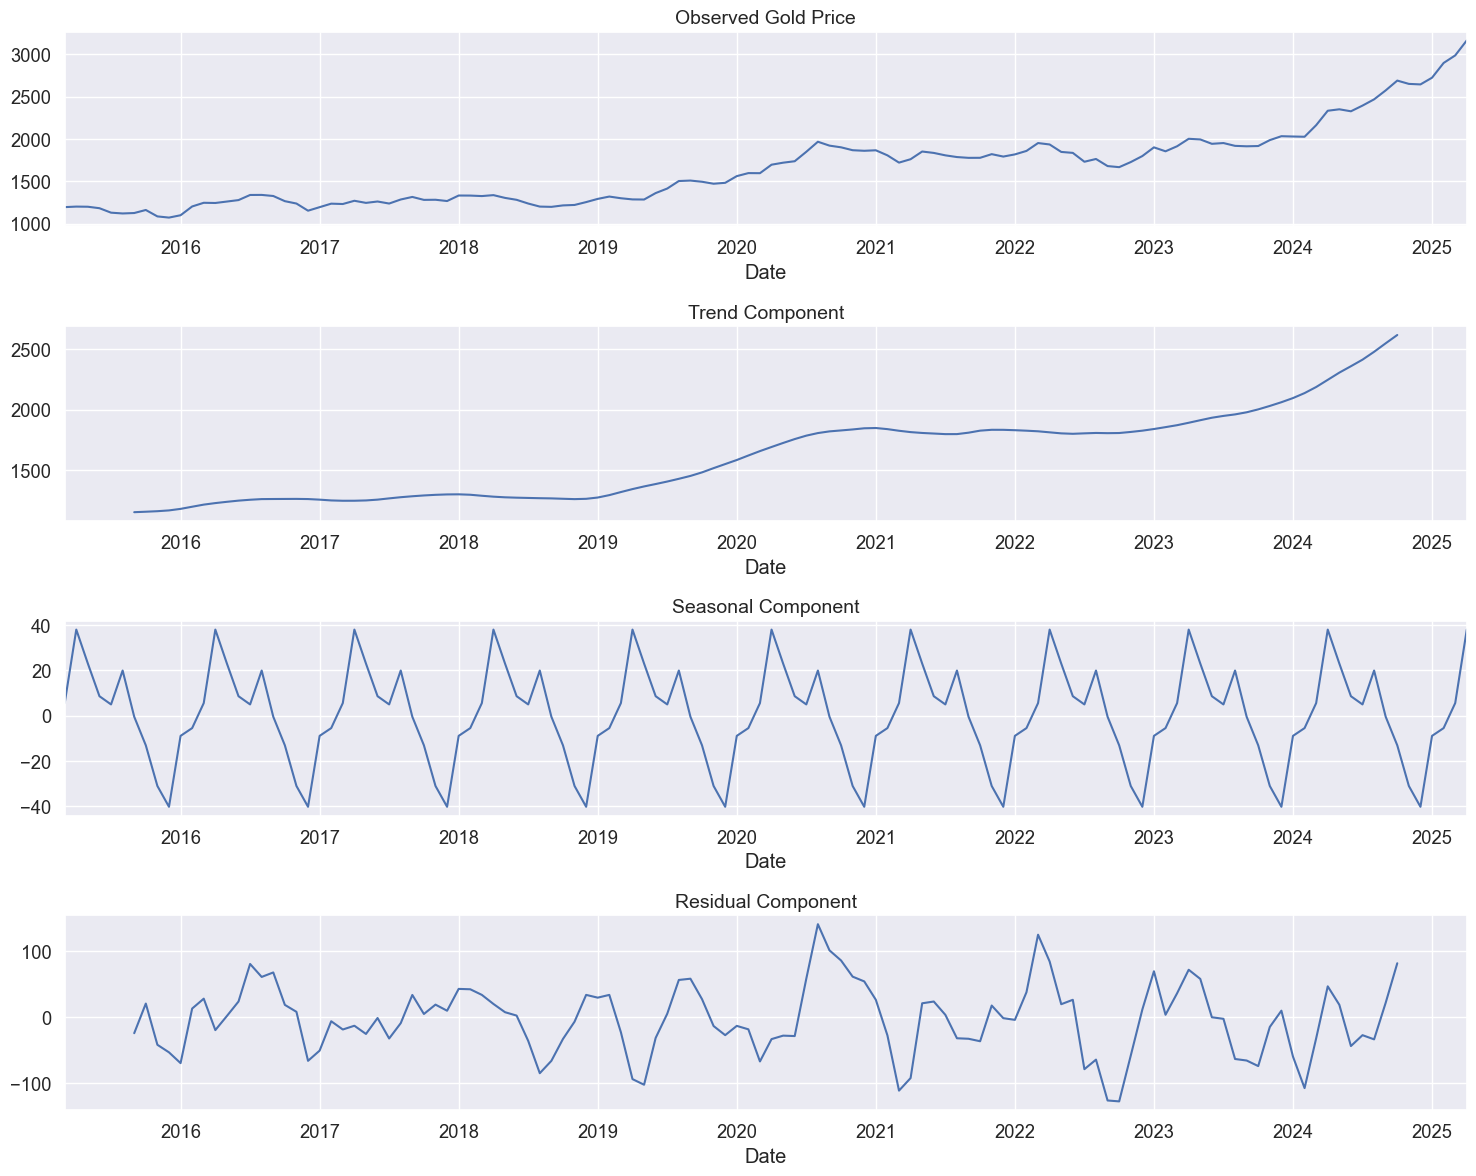

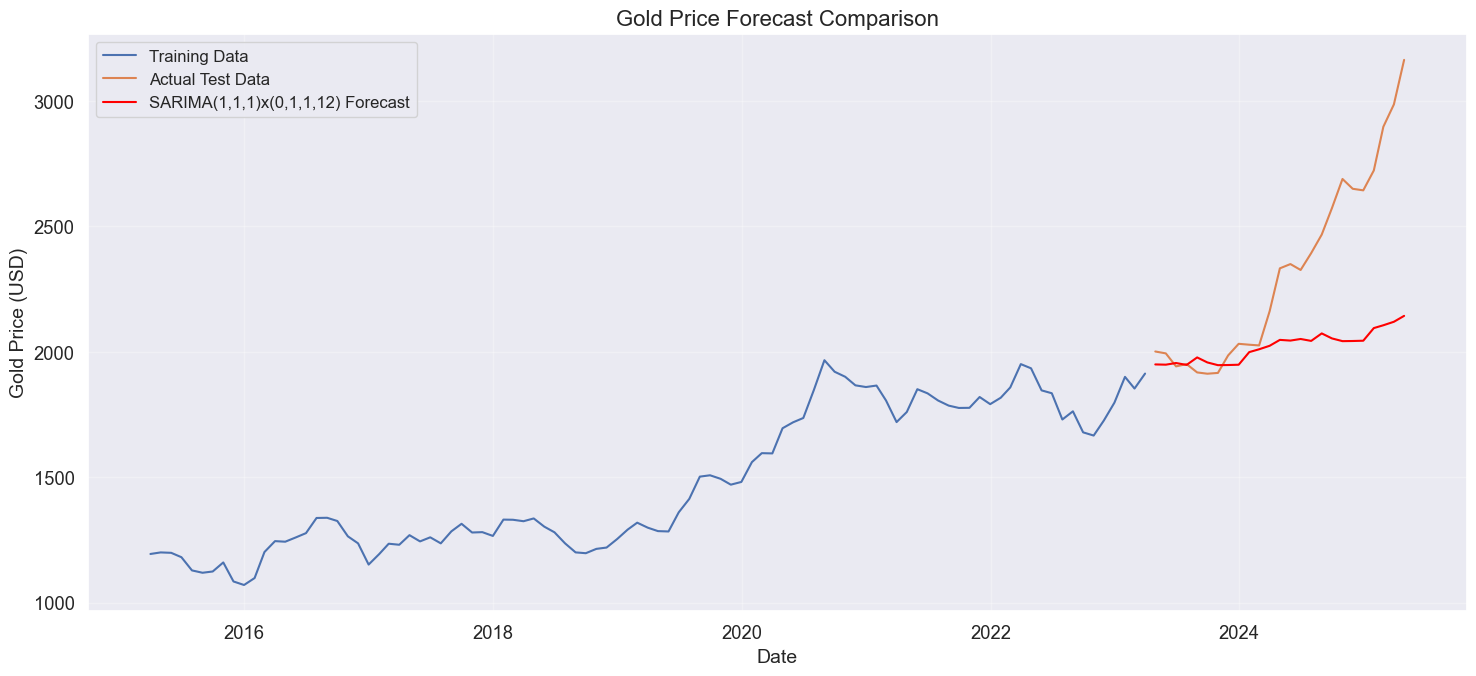

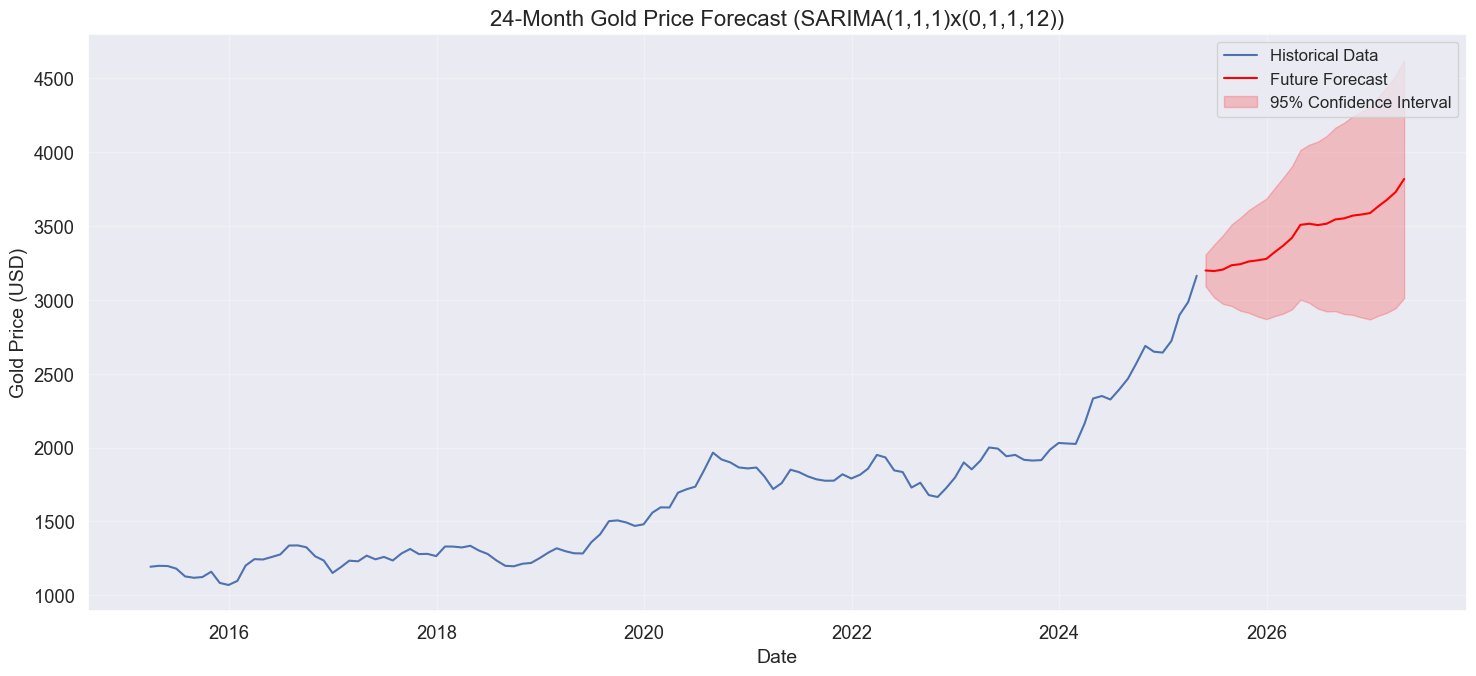

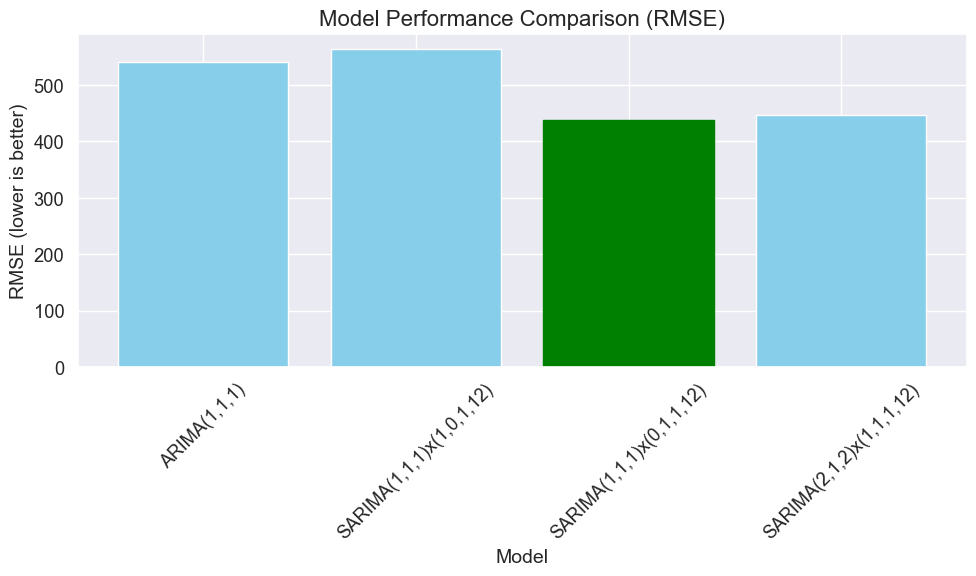

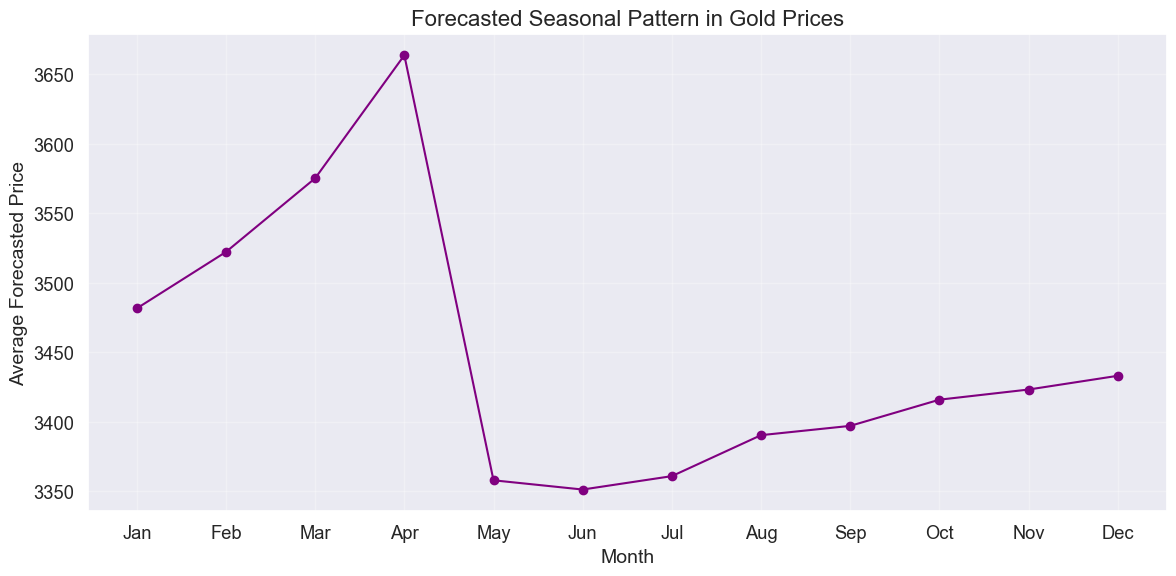

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

print("Loading the dataset...")
df = pd.read_csv('Futures_Resources_Data.csv')

# Parse the Date column and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df = df.sort_values('Date')

# For gold forecasting, we'll focus on GC=F as it typically has good data quality
target_commodity = 'GC=F_closing_price'
print(f"\nPerforming advanced time series analysis on {target_commodity.split('_')[0]}")

# Extract gold data and handle missing values
gold_data = df[['Date', target_commodity]].copy()
gold_data = gold_data.dropna()
gold_data.set_index('Date', inplace=True)

# If we have enough data, focus on the last 10 years for better seasonal patterns
if len(gold_data) > 10*252:  # Approx 252 trading days per year
    start_date = gold_data.index[-10*252]
    gold_data = gold_data[gold_data.index >= start_date]

print(f"Analysis period: {gold_data.index.min().strftime('%d %b %Y')} to {gold_data.index.max().strftime('%d %b %Y')}")
print(f"Number of data points: {len(gold_data)}")

# 1. Resample to monthly data for clearer seasonality patterns
monthly_data = gold_data.resample('M').mean()
print(f"Using {len(monthly_data)} months of data for analysis")

# 2. Seasonal Decomposition for visualization
print("\nDecomposing gold price time series...")
decomposition = seasonal_decompose(monthly_data, model='additive', period=12)

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed Gold Price', fontsize=14)
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend Component', fontsize=14)
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal Component', fontsize=14)
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual Component', fontsize=14)
plt.tight_layout()


# 3. Split data into train/test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[0:train_size], monthly_data[train_size:]
print(f"Training data: {train.index.min().strftime('%d %b %Y')} to {train.index.max().strftime('%d %b %Y')}")
print(f"Testing data: {test.index.min().strftime('%d %b %Y')} to {test.index.max().strftime('%d %b %Y')}")

# 4. Build and evaluate several models
models = [
    # Standard ARIMA model
    ('ARIMA(1,1,1)', SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,0,0))),
    
    # SARIMA models with different seasonal components
    ('SARIMA(1,1,1)x(1,0,1,12)', SARIMAX(train, order=(1,1,1), seasonal_order=(1,0,1,12))),
    ('SARIMA(1,1,1)x(0,1,1,12)', SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,1,12))),
    ('SARIMA(2,1,2)x(1,1,1,12)', SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,12)))
]

# Dictionary to store results
model_results = {}

print("\nFitting and evaluating forecasting models...")
for name, model in models:
    try:
        # Fit the model with controlled iterations
        print(f"Fitting {name}...")
        fitted_model = model.fit(disp=False, maxiter=50)
        
        # Check if the model converged
        if not fitted_model.mle_retvals.get('converged', True):
            print(f"  Warning: {name} did not converge. Results may be unreliable.")
        
        # Forecast on test data
        forecast = fitted_model.forecast(steps=len(test))
        
        # Ensure forecast values are not NaN
        if np.isnan(forecast).any():
            print(f"  Error: {name} produced NaN forecasts")
            continue
            
        # Calculate error metrics safely
        test_values = test.values.flatten()
        try:
            rmse = sqrt(mean_squared_error(test_values, forecast))
            mape = mean_absolute_percentage_error(test_values, forecast) * 100
            
            # Store results
            model_results[name] = {
                'model': fitted_model,
                'forecast': forecast,
                'rmse': rmse,
                'mape': mape
            }
            
            print(f"  RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
        except Exception as e:
            print(f"  Error calculating metrics for {name}: {str(e)}")
            
    except Exception as e:
        print(f"  Error fitting {name}: {str(e)}")

# If no models were successfully fit, try a simpler model
if not model_results:
    print("\nNo models were successfully fit. Trying a simpler model...")
    try:
        simple_model = SARIMAX(train, order=(1,1,0), seasonal_order=(0,0,0,0))
        simple_fitted = simple_model.fit(disp=False)
        simple_forecast = simple_fitted.forecast(steps=len(test))
        
        rmse = sqrt(mean_squared_error(test.values.flatten(), simple_forecast))
        mape = mean_absolute_percentage_error(test.values.flatten(), simple_forecast) * 100
        
        model_results["ARIMA(1,1,0)"] = {
            'model': simple_fitted,
            'forecast': simple_forecast,
            'rmse': rmse,
            'mape': mape
        }
        print(f"  Simple ARIMA(1,1,0) - RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    except Exception as e:
        print(f"  Even simple model failed: {str(e)}")

# 5. Identify best model
if model_results:
    # Sort models by RMSE (lower is better)
    best_model_name = min(model_results.keys(), key=lambda x: model_results[x]['rmse'])
    best_model = model_results[best_model_name]
    print(f"\nBest model: {best_model_name} with RMSE: {best_model['rmse']:.2f}, MAPE: {best_model['mape']:.2f}%")
    
    # Plot best model's forecast vs actual
    plt.figure(figsize=(15, 7))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Actual Test Data')
    plt.plot(test.index, best_model['forecast'], label=f'{best_model_name} Forecast', color='red')
    plt.title(f'Gold Price Forecast Comparison', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Gold Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    
    # 6. Use best model to forecast future prices
    print("\nForecasting future gold prices...")
    
    # Refit model on all available data
    if 'SARIMA' in best_model_name:
        # Extract order and seasonal_order from the model name
        order_parts = best_model_name.split('(')[1].split(')')[0].split(',')
        seasonal_parts = best_model_name.split('x(')[1].split(')')[0].split(',')
        
        p, d, q = map(int, order_parts)
        P, D, Q, s = map(int, seasonal_parts)
        
        full_model = SARIMAX(monthly_data, 
                            order=(p, d, q), 
                            seasonal_order=(P, D, Q, s))
    else:
        # Default to ARIMA(1,1,1) if parsing fails
        full_model = SARIMAX(monthly_data, order=(1,1,1), seasonal_order=(0,0,0,0))
    
    full_model_fit = full_model.fit(disp=False)
    
    # Forecast next 24 months
    future_steps = 24
    future_forecast = full_model_fit.forecast(steps=future_steps)
    
    # Create future date index
    last_date = monthly_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), 
                                periods=future_steps, freq='M')
    
    # Get prediction intervals
    pred_intervals = full_model_fit.get_forecast(steps=future_steps).conf_int(alpha=0.05)
    lower_bound = pred_intervals.iloc[:,0]
    upper_bound = pred_intervals.iloc[:,1]
    
    # Plot historical data and future forecast with confidence intervals
    plt.figure(figsize=(15, 7))
    plt.plot(monthly_data.index, monthly_data, label='Historical Data')
    plt.plot(future_dates, future_forecast, label='Future Forecast', color='red')
    plt.fill_between(future_dates, lower_bound, upper_bound, 
                    color='red', alpha=0.2, label='95% Confidence Interval')
    
    plt.title(f'24-Month Gold Price Forecast ({best_model_name})', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Gold Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
   
    
    # Create a table of forecasted values
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Forecasted Price': future_forecast,
        'Lower Bound (95%)': lower_bound,
        'Upper Bound (95%)': upper_bound
    })
    forecast_df.set_index('Date', inplace=True)
    
    print("\nForecasted Gold Prices (monthly):")
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(forecast_df.head(12))  # Show first year
    
    # Save forecast to CSV
    forecast_df.to_csv('gold_price_forecast.csv')
    print("Saved complete forecast to 'gold_price_forecast.csv'")
    
    # 7. Create visual summary of model performance
    plt.figure(figsize=(10, 6))
    model_names = list(model_results.keys())
    rmse_values = [model_results[model]['rmse'] for model in model_names]
    
    bars = plt.bar(model_names, rmse_values, color='skyblue')
    bars[model_names.index(best_model_name)].set_color('green')
    
    plt.title('Model Performance Comparison (RMSE)', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('RMSE (lower is better)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    
    # 8. Analyze forecast seasonality
    if len(future_forecast) >= 12:
        forecast_series = pd.Series(future_forecast, index=future_dates)
        forecast_monthly_avg = forecast_series.groupby(forecast_series.index.month).mean()
        
        plt.figure(figsize=(12, 6))
        plt.plot(forecast_monthly_avg.index, forecast_monthly_avg.values, marker='o', color='purple')
        plt.title('Forecasted Seasonal Pattern in Gold Prices', fontsize=16)
        plt.xlabel('Month', fontsize=14)
        plt.ylabel('Average Forecasted Price', fontsize=14)
        plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        

else:
    print("No successful models to generate forecasts")

print("\nAdvanced forecasting analysis complete! Check the generated visualizations and CSV file for detailed forecasts.")

plt.show() 

## Prophet Forecasting

22:54:16 - cmdstanpy - INFO - Chain [1] start processing


Loading the dataset...

Performing Prophet forecasting on GC=F
Analysis period: 01 Apr 2015 to 01 Apr 2025
Number of data points: 2514
Training data: 01 Apr 2015 to 30 Mar 2023
Testing data: 31 Mar 2023 to 01 Apr 2025

Training Prophet model...


22:54:19 - cmdstanpy - INFO - Chain [1] done processing


Evaluating model on test data...
Test set size: 503, Test predictions size: 503
Test data shape: (503,), Predictions shape: (503,)
Test Set RMSE: 368.15
Test Set MAPE: 10.17%

Generating future forecast with Prophet...


22:54:19 - cmdstanpy - INFO - Chain [1] start processing
22:54:21 - cmdstanpy - INFO - Chain [1] done processing


Creating visualization of forecast components...
Saved interactive Prophet plots as HTML files

Forecasted Gold Prices (monthly):
            Forecasted Price  Lower Bound (95%)  Upper Bound (95%)
Date                                                              
2025-04-30           $917.95            $863.48            $972.71
2025-05-31           $789.25            $729.68            $847.79
2025-06-30           $676.95            $607.54            $744.29
2025-07-31          $1027.25            $942.78           $1110.87
2025-08-31           $506.14            $391.84            $619.44
2025-09-30           $990.24            $836.18           $1140.58
2025-10-31          $1093.46            $887.92           $1293.18
2025-11-30           $392.30            $121.61            $663.30
2025-12-31          $1060.57            $742.71           $1369.08
2026-01-31           $812.80            $422.99           $1194.30
2026-02-28           $896.61            $440.48           $1343.92

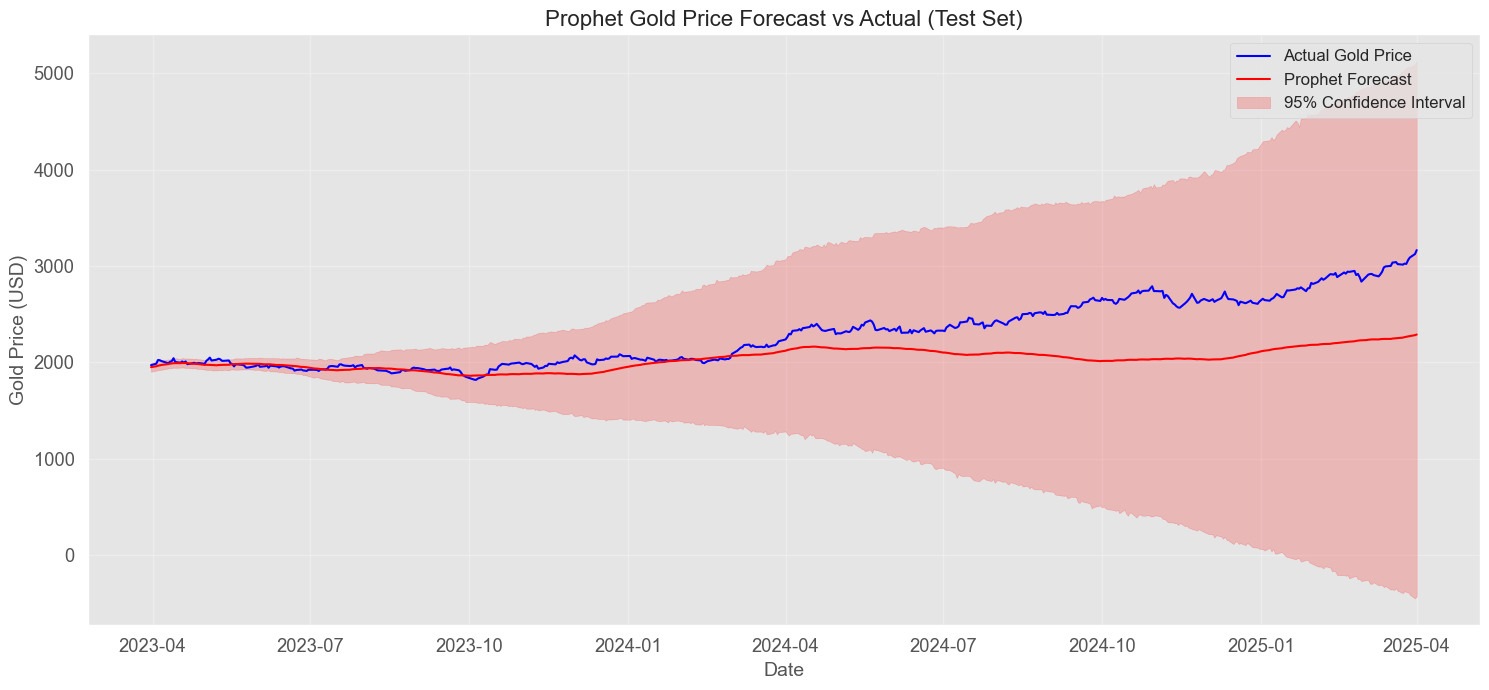

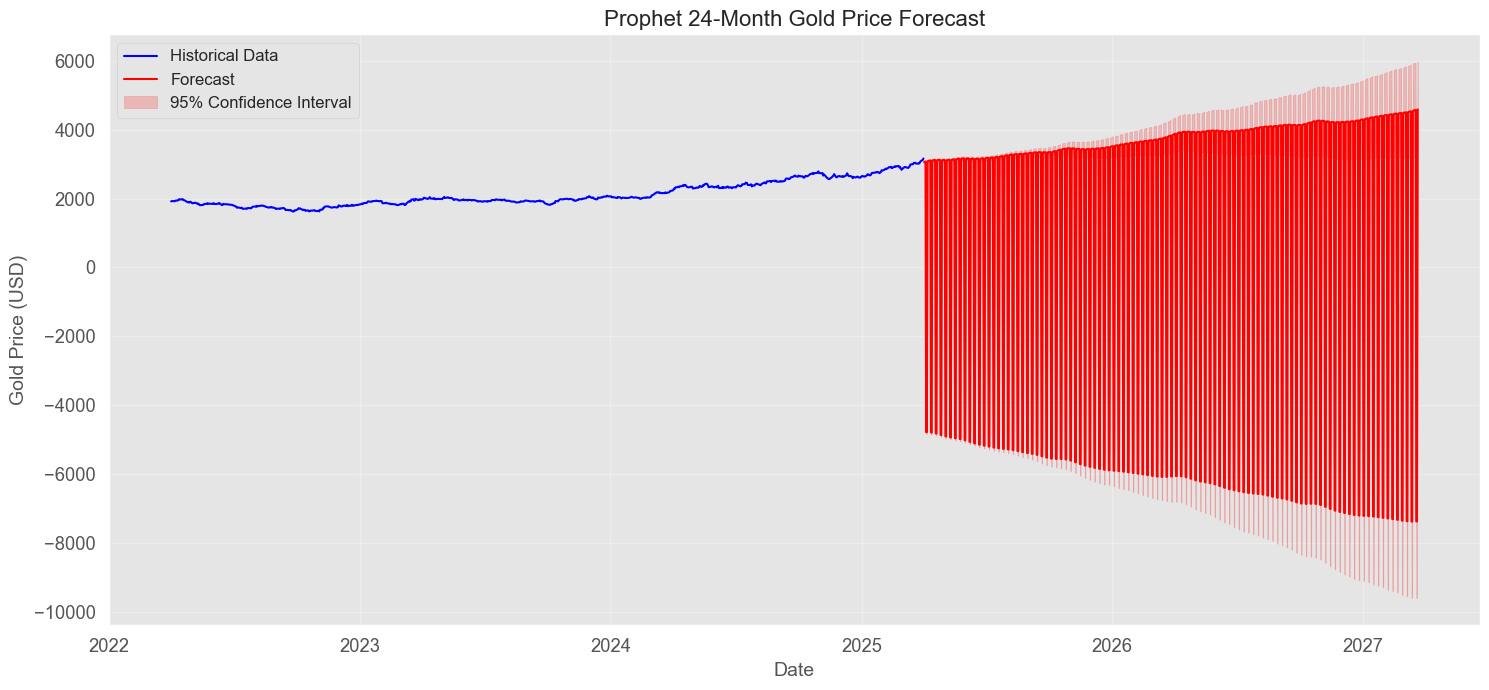

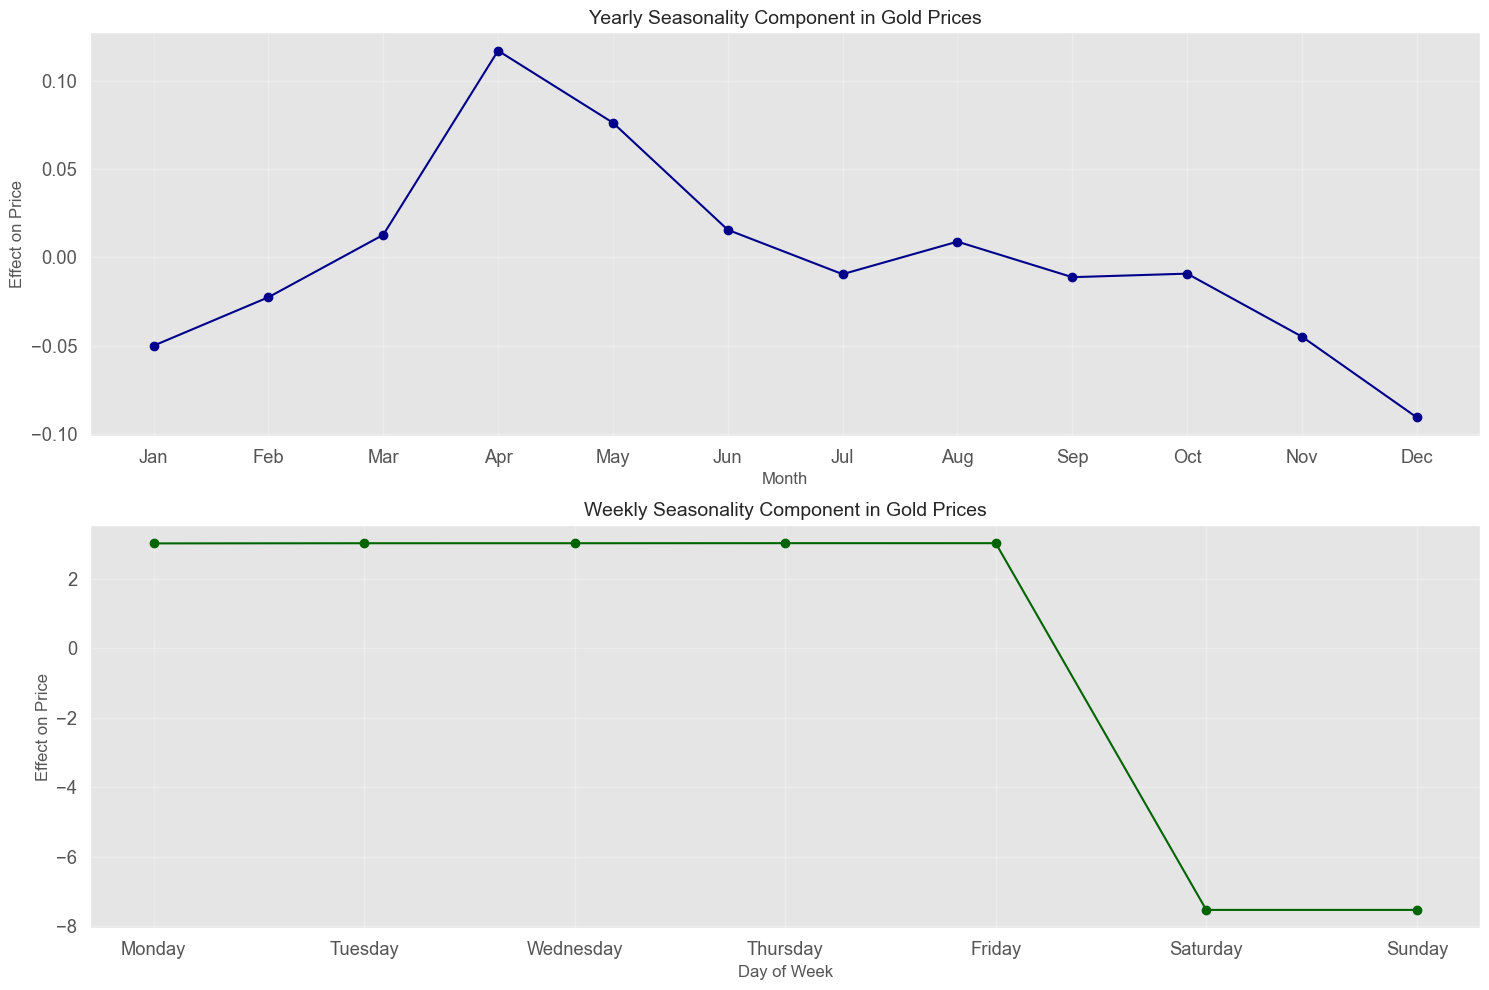

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')

print("Loading the dataset...")
df = pd.read_csv('Futures_Resources_Data.csv')

# Parse the Date column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df = df.sort_values('Date')

# For gold forecasting
target_commodity = 'GC=F_closing_price'
print(f"\nPerforming Prophet forecasting on {target_commodity.split('_')[0]}")

# Extract gold data and handle missing values
gold_data = df[['Date', target_commodity]].copy()
gold_data = gold_data.dropna()

# Prophet requires columns named 'ds' and 'y'
gold_data.columns = ['ds', 'y']

# If we have enough data, focus on the last 10 years for better seasonal patterns
if len(gold_data) > 10*252:  # Approx 252 trading days per year
    start_date = gold_data['ds'].max() - pd.DateOffset(years=10)
    gold_data = gold_data[gold_data['ds'] >= start_date]

print(f"Analysis period: {gold_data['ds'].min().strftime('%d %b %Y')} to {gold_data['ds'].max().strftime('%d %b %Y')}")
print(f"Number of data points: {len(gold_data)}")

# 1. Split data into train/test sets
train_size = int(len(gold_data) * 0.8)
train = gold_data[:train_size].copy()
test = gold_data[train_size:].copy()
print(f"Training data: {train['ds'].min().strftime('%d %b %Y')} to {train['ds'].max().strftime('%d %b %Y')}")
print(f"Testing data: {test['ds'].min().strftime('%d %b %Y')} to {test['ds'].max().strftime('%d %b %Y')}")

# 2. Build and train the Prophet model
print("\nTraining Prophet model...")
prophet_model = Prophet(
    # Model configuration
    changepoint_prior_scale=0.05,  # Flexibility in trend changes (0.05 is default)
    seasonality_prior_scale=10,    # Strength of seasonality (10 for stronger seasonal patterns)
    seasonality_mode='multiplicative',  # Good for financial data, especially with upward trends
    yearly_seasonality=True,       # Enable yearly seasonality component
    weekly_seasonality=True,       # Enable weekly patterns
    daily_seasonality=False,       # Disable daily patterns (usually noisy in financial data)
    changepoint_range=0.9,         # Allow trend changes up to 90% of the time series
)

# Add quarterly seasonality
prophet_model.add_seasonality(
    name='yearly',
    period=365.25,  # Average days in a quarter
    fourier_order=5  # Higher order for more flexibility
)

# Fit the model
prophet_model.fit(train)

# 3. Evaluate on test set
print("Evaluating model on test data...")
# The best approach is to create a dataframe with the exact test dates
test_dates = test['ds'].tolist()
future = pd.DataFrame({'ds': test_dates})

# Make predictions on exactly these test dates
test_forecast = prophet_model.predict(future)

# Verify sizes match
print(f"Test set size: {len(test)}, Test predictions size: {len(test_forecast)}")

# Ensure the order matches exactly
test_forecast = test_forecast.sort_values('ds')
test_sorted = test.sort_values('ds').reset_index(drop=True)

# Calculate error metrics
y_true = test_sorted['y'].values
y_pred = test_forecast['yhat'].values

print(f"Test data shape: {y_true.shape}, Predictions shape: {y_pred.shape}")
rmse = sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

print(f"Test Set RMSE: {rmse:.2f}")
print(f"Test Set MAPE: {mape:.2f}%")

# 4. Plot test predictions vs actual
plt.figure(figsize=(15, 7))
plt.plot(test_sorted['ds'], test_sorted['y'], label='Actual Gold Price', color='blue')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Prophet Forecast', color='red')
plt.fill_between(
    test_forecast['ds'],
    test_forecast['yhat_lower'],
    test_forecast['yhat_upper'],
    color='red', alpha=0.2, label='95% Confidence Interval'
)
plt.title('Prophet Gold Price Forecast vs Actual (Test Set)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gold Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()


# 5. Create future forecast
print("\nGenerating future forecast with Prophet...")

# Retrain on full dataset
full_prophet_model = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10,
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_range=0.9,
)

full_prophet_model.add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=5
)

full_prophet_model.fit(gold_data)

# Create future dataframe for 24 months ahead (with daily frequency)
# Get the last date in our data
last_date = gold_data['ds'].max()
months_to_forecast = 24

# Create a properly spaced future dataframe
future_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=1),  # Start from the day after the last date
    periods=months_to_forecast * 30,         # Approx 30 days per month
    freq='D'                                 # Daily frequency
)
future = pd.DataFrame({'ds': future_dates})

# Make predictions
forecast = full_prophet_model.predict(future)

# 6. Plot full forecast with components
print("Creating visualization of forecast components...")
# Full forecast plot
fig = plot_plotly(full_prophet_model, forecast)
fig.write_html("prophet_full_forecast.html")

# Components plot (trend, seasonality)
fig_comp = plot_components_plotly(full_prophet_model, forecast)
fig_comp.write_html("prophet_components.html")

print("Saved interactive Prophet plots as HTML files")

# 7. Plot future forecast with matplotlib (for static image)
plt.figure(figsize=(15, 7))

# Get most recent date in data
last_date = gold_data['ds'].max()

# Filter to show only the past 3 years + forecast
three_years_ago = last_date - pd.DateOffset(years=3)
recent_data = gold_data[gold_data['ds'] >= three_years_ago]

# Plot actual data
plt.plot(recent_data['ds'], recent_data['y'], label='Historical Data', color='blue')

# Plot future forecast (forecast beyond the last actual date)
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    color='red', alpha=0.2, label='95% Confidence Interval'
)

plt.title('Prophet 24-Month Gold Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gold Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()


# 8. Export forecast data to CSV
future_forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
future_forecast_df.columns = ['Date', 'Forecasted Price', 'Lower Bound (95%)', 'Upper Bound (95%)']
future_forecast_df.set_index('Date', inplace=True)

# Round monthly dates (for easier reading)
monthly_forecast = future_forecast_df.resample('M').mean()

# Save to CSV
monthly_forecast.to_csv('prophet_gold_forecast.csv')

print("\nForecasted Gold Prices (monthly):")
pd.set_option('display.float_format', '${:.2f}'.format)
print(monthly_forecast.head(12))  # Show first year forecast
print("Saved monthly forecast to 'prophet_gold_forecast.csv'")

# 9. Analyze seasonal components
plt.figure(figsize=(15, 10))

# Create subplot for yearly seasonality
plt.subplot(2, 1, 1)
# Check if yearly seasonality column exists
if 'yearly' in forecast.columns:
    yearly_seasonality = forecast.groupby(forecast['ds'].dt.month)['yearly'].mean()
    plt.plot(yearly_seasonality.index, yearly_seasonality.values, marker='o', color='darkblue')
    plt.title('Yearly Seasonality Component in Gold Prices', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Effect on Price', fontsize=12)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Yearly seasonality component not available', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=14)

# Create subplot for weekly seasonality
plt.subplot(2, 1, 2)
# Check if weekly seasonality column exists
if 'weekly' in forecast.columns:
    weekly_seasonality = forecast.groupby(forecast['ds'].dt.dayofweek)['weekly'].mean()
    plt.plot(weekly_seasonality.index, weekly_seasonality.values, marker='o', color='darkgreen')
    plt.title('Weekly Seasonality Component in Gold Prices', fontsize=14)
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Effect on Price', fontsize=12)
    plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Weekly seasonality component not available', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=14)

plt.tight_layout()


print("\nProphet forecasting analysis complete! Check the generated visualizations and CSV files for detailed forecasts.")

# Optional: Show all figures if running in interactive mode
plt.show() 

## Portafolio Optimization

Loading the dataset...
Selected commodities for portfolio analysis: CL=F, GC=F, SI=F, HG=F, PL=F

Missing data percentage for each commodity:
  CL=F: 0.08%
  GC=F: 0.08%
  SI=F: 0.08%
  HG=F: 0.00%
  PL=F: 0.08%

==== RETURN AND RISK ANALYSIS ====
      Annualized Return (%)  Annualized Volatility (%)  Sharpe Ratio
CL=F                $-37.71                    $156.21        $-0.24
GC=F                 $15.11                     $15.34         $0.99
SI=F                 $23.63                     $32.54         $0.73
HG=F                 $19.61                     $23.93         $0.82
PL=F                 $11.39                     $30.71         $0.37

==== PORTFOLIO OPTIMIZATION ====
Calculating optimal portfolio allocation...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL 

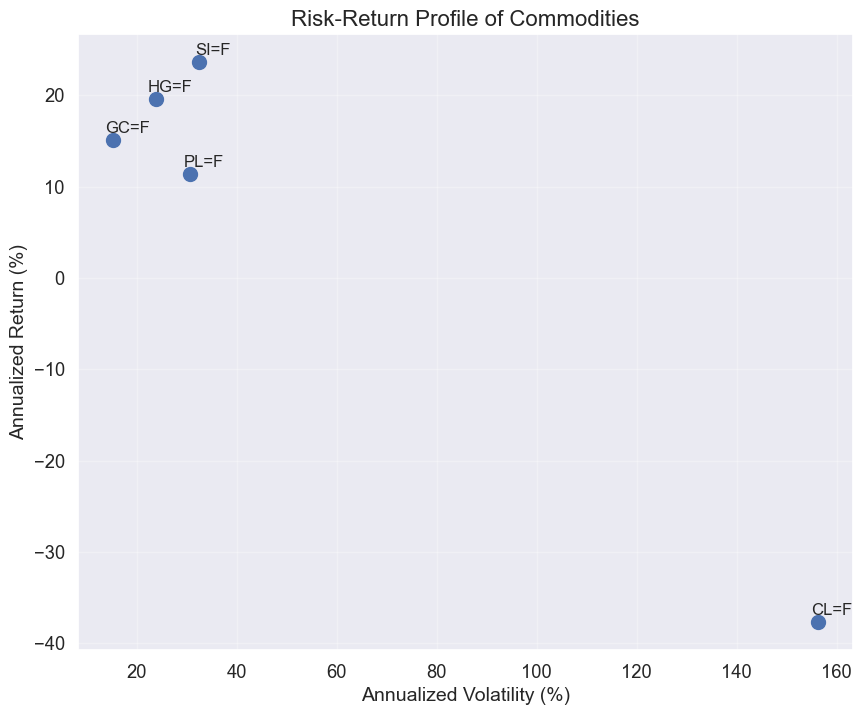

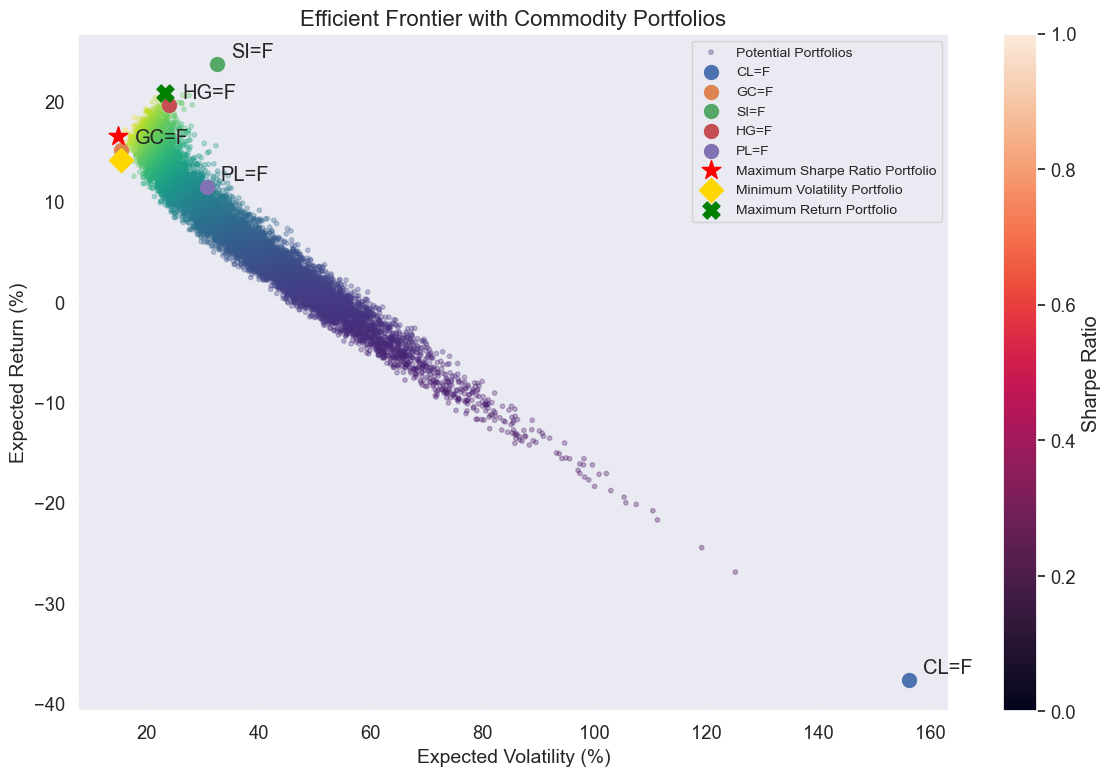

<Figure size 1400x800 with 0 Axes>

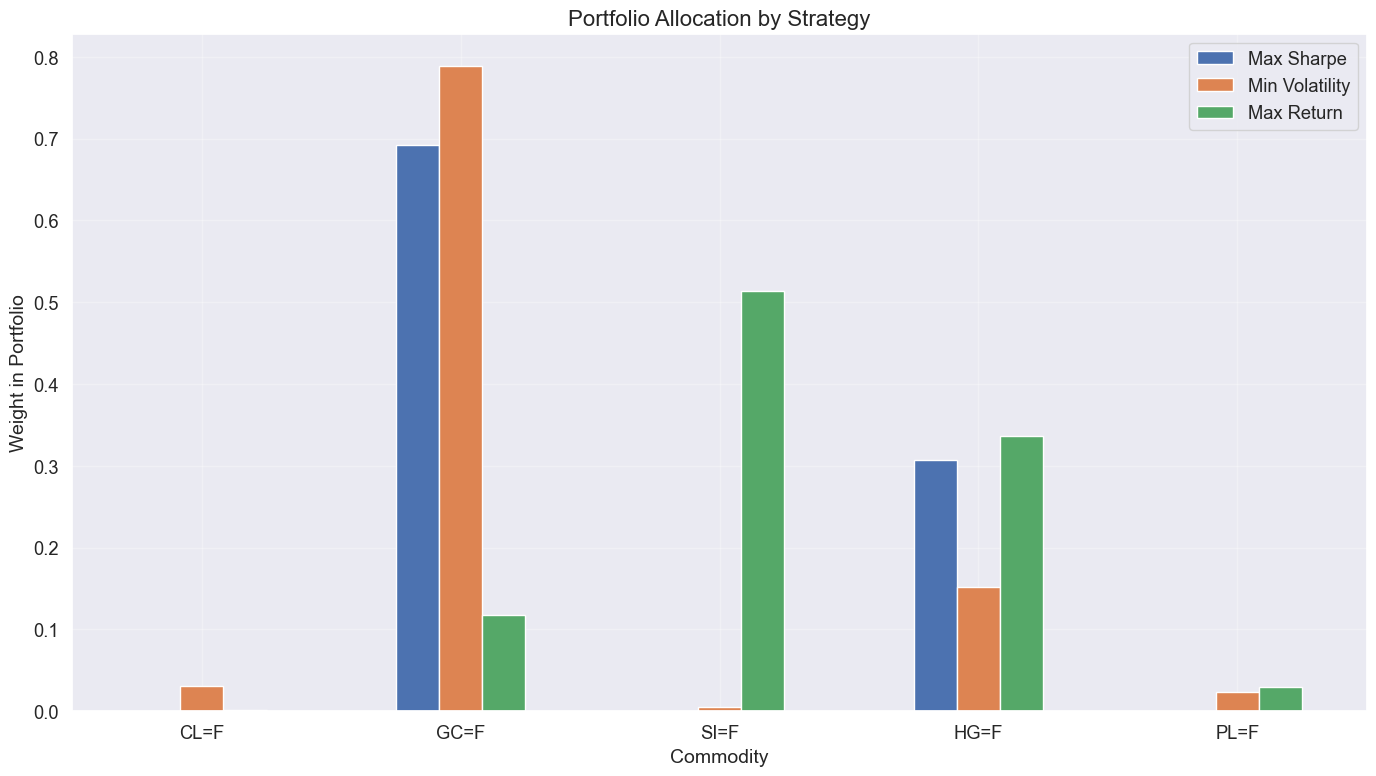

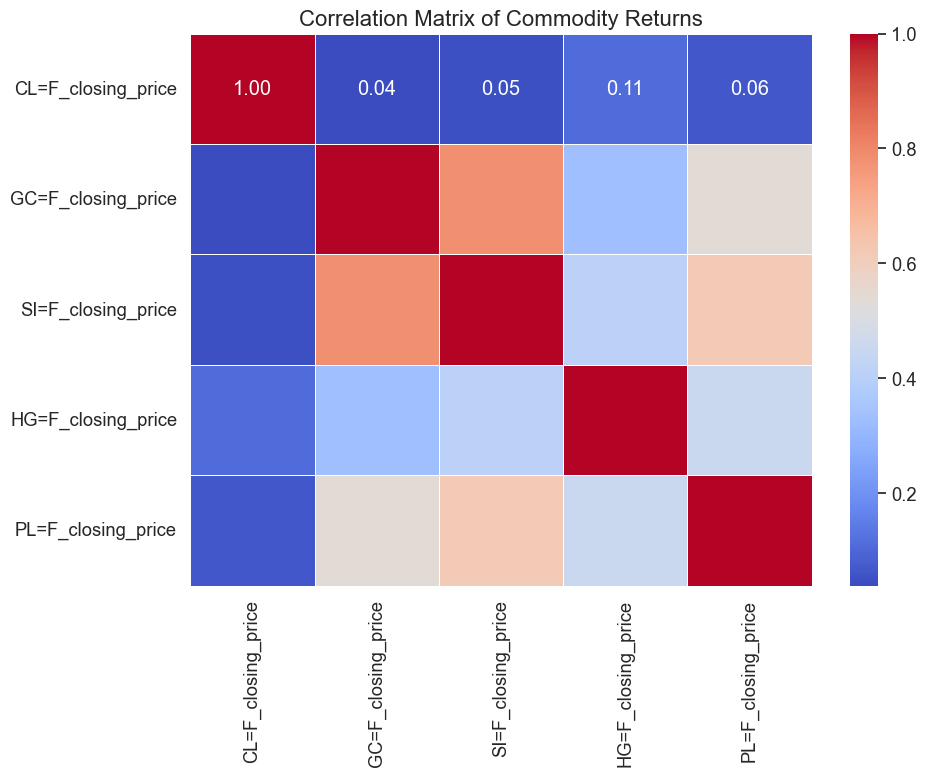

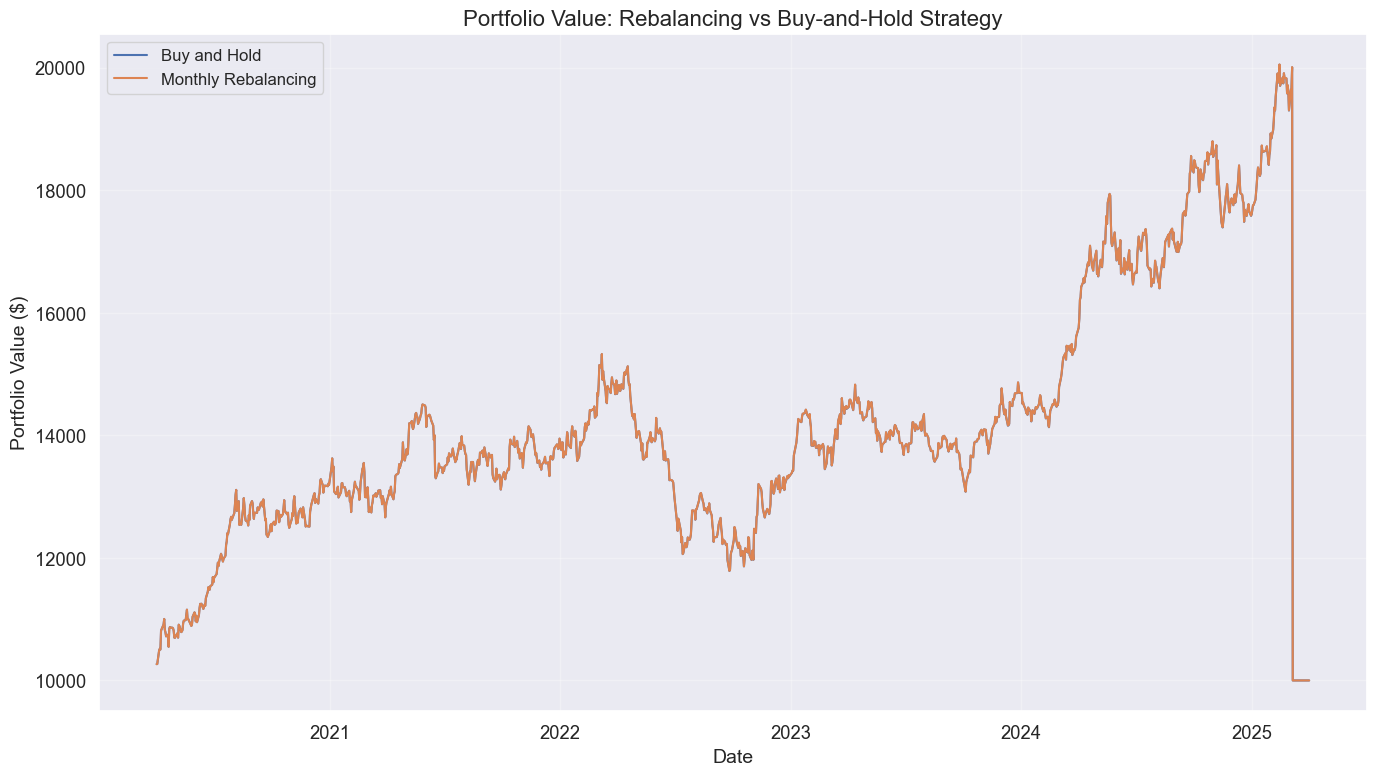

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

print("Loading the dataset...")
df = pd.read_csv('Futures_Resources_Data.csv')

# Parse the Date column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df = df.sort_values('Date')

# Select major commodities for portfolio analysis
# Choose commodities with good data coverage
commodities = ['CL=F', 'GC=F', 'SI=F', 'HG=F', 'PL=F']  # Oil, Gold, Silver, Copper, Platinum
print(f"Selected commodities for portfolio analysis: {', '.join(commodities)}")

# Focus on last 5 years of data for more relevant results
five_years_ago = df['Date'].max() - pd.DateOffset(years=5)
recent_data = df[df['Date'] >= five_years_ago].copy()

# Extract price data for selected commodities
price_columns = [f"{commodity}_closing_price" for commodity in commodities]
prices = recent_data[['Date'] + price_columns].copy()

# Check for missing values and handle them
missing_pct = prices[price_columns].isna().mean() * 100
print("\nMissing data percentage for each commodity:")
for col, pct in zip(commodities, missing_pct):
    print(f"  {col}: {pct:.2f}%")

# Forward fill missing values (use previous day's price)
prices.set_index('Date', inplace=True)
prices = prices.fillna(method='ffill')

# Calculate daily returns
daily_returns = prices.pct_change().dropna()

# 1. Return and Risk Analysis
print("\n==== RETURN AND RISK ANALYSIS ====")
# Calculate annualized returns and volatility
# Assuming 252 trading days in a year
annualized_returns = daily_returns.mean() * 252 * 100  # convert to percentage
annualized_volatility = daily_returns.std() * np.sqrt(252) * 100  # convert to percentage

# Create risk-return summary
risk_return = pd.DataFrame({
    'Annualized Return (%)': annualized_returns,
    'Annualized Volatility (%)': annualized_volatility,
    'Sharpe Ratio': annualized_returns / annualized_volatility  # Assuming risk-free rate of 0 for simplicity
})
risk_return.index = commodities

print(risk_return)

# Plot risk-return chart
plt.figure(figsize=(10, 8))
plt.scatter(risk_return['Annualized Volatility (%)'], risk_return['Annualized Return (%)'], s=100)

# Label each point with the commodity name
for i, commodity in enumerate(commodities):
    plt.annotate(commodity, 
                 (risk_return['Annualized Volatility (%)'][i], risk_return['Annualized Return (%)'][i]),
                 textcoords="offset points", 
                 xytext=(10, 5), 
                 ha='center',
                 fontsize=12)

plt.title('Risk-Return Profile of Commodities', fontsize=16)
plt.xlabel('Annualized Volatility (%)', fontsize=14)
plt.ylabel('Annualized Return (%)', fontsize=14)
plt.grid(True, alpha=0.3)


# 2. Portfolio Optimization - Efficient Frontier
print("\n==== PORTFOLIO OPTIMIZATION ====")

# Function to calculate portfolio returns and volatility
def portfolio_performance(weights, returns):
    # Returns in decimal
    returns_array = returns.mean() * 252
    # Volatility in decimal
    volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    # Return annualized returns and volatility in percentage
    return returns_array @ weights * 100, volatility * 100

# Function to minimize negative Sharpe Ratio
def negative_sharpe_ratio(weights, returns):
    p_returns, p_volatility = portfolio_performance(weights, returns)
    return -p_returns / p_volatility

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Bounds: weights are between 0 and 1 (no short selling)
bounds = tuple((0, 1) for _ in range(len(commodities)))
# Initial guess: equal weights
initial_weights = np.array([1/len(commodities)] * len(commodities))

# Find the optimal portfolio (maximum Sharpe ratio)
print("Calculating optimal portfolio allocation...")
optimal_result = minimize(negative_sharpe_ratio, initial_weights, args=(daily_returns,), 
                         method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimal_result['x']
optimal_returns, optimal_volatility = portfolio_performance(optimal_weights, daily_returns)
optimal_sharpe = optimal_returns / optimal_volatility

print("\nOptimal Portfolio (Maximum Sharpe Ratio):")
for commodity, weight in zip(commodities, optimal_weights):
    print(f"  {commodity}: {weight*100:.2f}%")
print(f"Expected Annual Return: {optimal_returns:.2f}%")
print(f"Expected Annual Volatility: {optimal_volatility:.2f}%")
print(f"Sharpe Ratio: {optimal_sharpe:.3f}")

# Generate random portfolios for the efficient frontier
print("\nGenerating efficient frontier...")
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
all_weights = np.zeros((num_portfolios, len(commodities)))

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(commodities))
    weights = weights / np.sum(weights)
    all_weights[i,:] = weights
    
    # Calculate portfolio returns and volatility
    portfolio_return, portfolio_volatility = portfolio_performance(weights, daily_returns)
    
    # Store results
    results[0,i] = portfolio_volatility  # Volatility
    results[1,i] = portfolio_return      # Return
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

# Find the minimum volatility portfolio
min_vol_idx = np.argmin(results[0])
min_vol_weights = all_weights[min_vol_idx,:]
min_vol_return, min_vol_volatility = portfolio_performance(min_vol_weights, daily_returns)
min_vol_sharpe = min_vol_return / min_vol_volatility

print("\nMinimum Volatility Portfolio:")
for commodity, weight in zip(commodities, min_vol_weights):
    print(f"  {commodity}: {weight*100:.2f}%")
print(f"Expected Annual Return: {min_vol_return:.2f}%")
print(f"Expected Annual Volatility: {min_vol_volatility:.2f}%")
print(f"Sharpe Ratio: {min_vol_sharpe:.3f}")

# Find the maximum return portfolio
max_return_idx = np.argmax(results[1])
max_return_weights = all_weights[max_return_idx,:]
max_return, max_return_volatility = portfolio_performance(max_return_weights, daily_returns)
max_return_sharpe = max_return / max_return_volatility

print("\nMaximum Return Portfolio:")
for commodity, weight in zip(commodities, max_return_weights):
    print(f"  {commodity}: {weight*100:.2f}%")
print(f"Expected Annual Return: {max_return:.2f}%")
print(f"Expected Annual Volatility: {max_return_volatility:.2f}%")
print(f"Sharpe Ratio: {max_return_sharpe:.3f}")

# Plot the efficient frontier
plt.figure(figsize=(12, 8))

# Plot random portfolios
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis', 
            alpha=0.3, s=10, label='Potential Portfolios')

# Plot individual commodities
for i, commodity in enumerate(commodities):
    single_asset_volatility = daily_returns.iloc[:, i].std() * np.sqrt(252) * 100
    single_asset_return = daily_returns.iloc[:, i].mean() * 252 * 100
    plt.scatter(single_asset_volatility, single_asset_return, s=100, label=commodity)
    plt.annotate(commodity, (single_asset_volatility, single_asset_return),
                xytext=(10, 5), textcoords='offset points')

# Plot optimal portfolio
plt.scatter(optimal_volatility, optimal_returns, s=200, c='red', marker='*', label='Maximum Sharpe Ratio Portfolio')
# Plot min volatility portfolio
plt.scatter(min_vol_volatility, min_vol_return, s=150, c='gold', marker='D', label='Minimum Volatility Portfolio')
# Plot max return portfolio
plt.scatter(max_return_volatility, max_return, s=150, c='green', marker='X', label='Maximum Return Portfolio')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility (%)', fontsize=14)
plt.ylabel('Expected Return (%)', fontsize=14)
plt.title('Efficient Frontier with Commodity Portfolios', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.2)
plt.tight_layout()


# 3. Optimal Portfolio Weightings Visualization
print("\nVisualizing portfolio weightings...")
# Create a DataFrame with the weights of each portfolio type
portfolio_weights = pd.DataFrame({
    'Max Sharpe': optimal_weights,
    'Min Volatility': min_vol_weights,
    'Max Return': max_return_weights
}, index=commodities)

# Plot the weights
plt.figure(figsize=(14, 8))
portfolio_weights.plot(kind='bar', figsize=(14, 8))
plt.title('Portfolio Allocation by Strategy', fontsize=16)
plt.xlabel('Commodity', fontsize=14)
plt.ylabel('Weight in Portfolio', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()


# 4. Correlation Heatmap for Portfolio Components
plt.figure(figsize=(10, 8))
correlation_matrix = daily_returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Commodity Returns', fontsize=16)
plt.tight_layout()


# 5. Portfolio Rebalancing Analysis
print("\n==== PORTFOLIO REBALANCING ANALYSIS ====")
# Simulate portfolio performance with monthly rebalancing vs buy-and-hold
# Divide the data into quarters for analysis
days_per_month = 21  # approx trading days per month
num_months = len(daily_returns) // days_per_month

if num_months > 0:
    # Initialize portfolio values
    initial_investment = 10000  # $10,000 investment
    
    # Buy-and-hold strategy: allocate once using optimal weights and never rebalance
    buy_hold_portfolio = pd.DataFrame(index=daily_returns.index)
    buy_hold_portfolio['value'] = initial_investment
    
    # Monthly rebalancing strategy: reallocate to optimal weights each month
    rebalanced_portfolio = pd.DataFrame(index=daily_returns.index)
    rebalanced_portfolio['value'] = initial_investment
    
    # Simulate portfolio performance
    for i in range(num_months):
        start_idx = i * days_per_month
        end_idx = min((i + 1) * days_per_month, len(daily_returns))
        
        month_returns = daily_returns.iloc[start_idx:end_idx]
        
        if i == 0:
            # Initial allocation for both portfolios is the same
            buy_hold_cumulative_return = (month_returns @ optimal_weights + 1).cumprod()
            rebalance_cumulative_return = buy_hold_cumulative_return
        else:
            # Buy and hold: continue with existing allocations
            month_buy_hold = (month_returns @ current_weights + 1).cumprod()
            buy_hold_cumulative_return = buy_hold_cumulative_return.iloc[-1] * month_buy_hold
            
            # Rebalanced: reset to optimal weights at the start of each month
            month_rebalance = (month_returns @ optimal_weights + 1).cumprod()
            rebalance_cumulative_return = rebalance_cumulative_return.iloc[-1] * month_rebalance
            
        # Update buy and hold weights based on asset performance
        current_weights = optimal_weights * (1 + month_returns.mean())
        current_weights = current_weights / np.sum(current_weights)
        
        # Store portfolio values
        buy_hold_portfolio.iloc[start_idx:end_idx, 0] = initial_investment * buy_hold_cumulative_return
        rebalanced_portfolio.iloc[start_idx:end_idx, 0] = initial_investment * rebalance_cumulative_return
    
    # Plot the portfolio values over time
    plt.figure(figsize=(14, 8))
    plt.plot(buy_hold_portfolio.index, buy_hold_portfolio['value'], label='Buy and Hold')
    plt.plot(rebalanced_portfolio.index, rebalanced_portfolio['value'], label='Monthly Rebalancing')
    plt.title('Portfolio Value: Rebalancing vs Buy-and-Hold Strategy', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Portfolio Value ($)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    
    # Calculate performance metrics
    buy_hold_return = (buy_hold_portfolio['value'].iloc[-1] / initial_investment - 1) * 100
    rebalance_return = (rebalanced_portfolio['value'].iloc[-1] / initial_investment - 1) * 100
    
    print(f"\nBuy and Hold Strategy Return: {buy_hold_return:.2f}%")
    print(f"Monthly Rebalancing Strategy Return: {rebalance_return:.2f}%")
    print(f"Difference: {rebalance_return - buy_hold_return:.2f}%")

print("\nPortfolio optimization analysis complete! Check the generated visualizations for insights.")

# Show all figures
plt.show() 